In [22]:
%matplotlib inline  

import numpy as np
import matplotlib.pylab as plt

MORPH_DATA_TR = 'train.baseline.tr'
MORPH_DATA_ENG = 'train.baseline.eng'
SURFACE_DATA_TR = 'original.tr'
SURFACE_DATA_ENG = 'original.eng'
MORPH_SUBSET_DATA_TR = 'morph.tr'
MORPH_SUBSET_DATA_ENG = 'morph.eng'

In [6]:
# Question 1
def remove_one_token_lines(in_file_tr, in_file_eng):
    """
    This method removes all lines with one token in a given file, and writes the result to another file

    :param in_file_tr: turkish file name from which we will remove the tokens of length one
    :param in_file_eng: english file name from which we will remove the corresponding lines (look at project description)
    :param out_file_name: file where we will write the results of our operation

    :return morph_line_count: number of lines in new files for both tr and eng files
    """

    # Remember to write your results to the files morph.tr and morph.eng

    morph_lines_tr = []
    morph_lines_eng = []
    with open(in_file_tr) as file_tr, open(in_file_eng) as file_eng, \
            open(MORPH_SUBSET_DATA_TR, 'w+') as output_tr, open(MORPH_SUBSET_DATA_ENG, 'w+') as output_eng:
        for line_tr, line_eng in zip(file_tr, file_eng):
            l_tr = line_tr.split(' ')
            l_eng = line_eng.split(' ')
            if len(l_tr[:-1]) > 1:
                morph_lines_tr.append(l_tr)
                for l in l_tr:
                    output_tr.write(str(l)+' ') if l_tr[len(l_tr)-1] != l else output_tr.write(str(l))

                morph_lines_eng.append(l_eng)
                for l in l_eng:
                    output_eng.write(str(l)+' ') if l_eng[len(l_eng)-1] != l else output_eng.write(str(l))

    morph_line_count_tr = len(morph_lines_tr)
    morph_line_count_eng = len(morph_lines_eng)

    print("In Turkish file, the number of remaining lines: " + str(morph_line_count_tr))
    print("In English file, the number of remaining lines: " + str(morph_line_count_eng))

    return morph_line_count_tr, morph_line_count_eng

In [7]:
morph_line_count_tr, morph_line_count_eng = remove_one_token_lines(MORPH_DATA_TR, MORPH_DATA_ENG)

In Turkish file, the number of remaining lines: 119833
In English file, the number of remaining lines: 119833


In [8]:
# Question 2a
def get_num_of_tokens(in_file_name):
    """
    Finds the number of tokens in a given file
    :param in_file_name: name of the input file

    :return num_of_tokens: the number of tokens in the given file
    """

    num_of_tokens = 0
    morph_data = []
    with open(in_file_name) as file:
        for line in file:
            morph_data.append(line)
            num_of_tokens = num_of_tokens + len(line.split(' '))

    return num_of_tokens

In [9]:
get_num_of_tokens(MORPH_SUBSET_DATA_TR)

1210666

In [84]:
get_num_of_tokens(MORPH_SUBSET_DATA_ENG)

1422894

The number of tokens in English data that we extracted from the originals is higher than Turkish one. This could be interpreted as that it is required to use more words to express the same context in English than Turkish. 

In [11]:
# Question 2b
def get_num_of_unique_tokens(in_file_name):
    """
    Finds the number of times each token appears in a given file
    :param in_file_name: name of the input file

    :return unique_tokens: The number of unique tokens in the given file
    """

    morph_data = []
    with open(in_file_name) as file:
        for line in file:
            for token in line.split(' '):
                if token not in morph_data:
                    morph_data.append(token)

    unique_tokens = len(morph_data)

    return unique_tokens

In [12]:
get_num_of_unique_tokens(MORPH_SUBSET_DATA_TR)

69939

In [13]:
get_num_of_unique_tokens(MORPH_SUBSET_DATA_ENG)

48442

In [14]:
get_num_of_unique_tokens(SURFACE_DATA_TR)

70986

In [15]:
get_num_of_unique_tokens(SURFACE_DATA_ENG)

32114

By the contrast with the total number of tokens, it is required to use more <u>unique</u> words to express the same context in Turkish than English.

In [16]:
# Question 3a
def get_token_freq_distribution(in_file_name):
    """
    Finds the number of times each token appears in a given file
    :param in_file_name:

    :return freq_dist: A list of tuples with the frequency of each token sorted in descending order 
    """

    # why we should have to do this with tuple? sorted(dict) ???
    token_dict = dict()

    with open(in_file_name) as file:
        for line in file:
            for token in line.split(' '):
                if token in token_dict.keys():
                    token_dict[token] += 1
                elif token == '\n':
                    continue
                else:
                    token_dict[token] = 1

    freq_dist = sorted([(k, v) for k, v in token_dict.items()], reverse=True, key=lambda x: x[1])

    return freq_dist

In [17]:
freq_dist_tr = get_token_freq_distribution(MORPH_SUBSET_DATA_TR)

In [18]:
freq_dist_eng = get_token_freq_distribution(MORPH_SUBSET_DATA_ENG)

In [19]:
freq_dist_org_tr = get_token_freq_distribution(SURFACE_DATA_TR)

In [20]:
freq_dist_org_eng = get_token_freq_distribution(SURFACE_DATA_ENG)

In [21]:
# Question 3b
def plot_freq_dist(freq_dist):
    """
    Plots the relationship between log of rank and log of frequency
    :param freq_dist: 

    :return: void
    """
    # Plot the freq distribution you found in 3a. Can you observe Zipf's law?

    lg_rank = np.emath.log([i for i, v in enumerate(freq_dist)])  # ??
    lg_freq = np.emath.log([v[1] for v in freq_dist])  # ??

    plt.plot(lg_rank, lg_freq)
    plt.show()

c:\users\fk2969\appdata\local\programs\python\python35\lib\site-packages\numpy\lib\scimath.py:262: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)


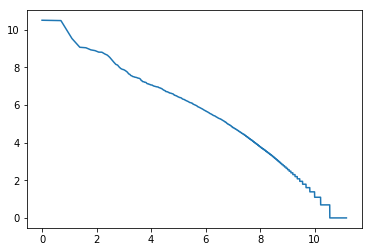

In [25]:
plot_freq_dist(freq_dist_org_tr)

c:\users\fk2969\appdata\local\programs\python\python35\lib\site-packages\numpy\lib\scimath.py:262: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)


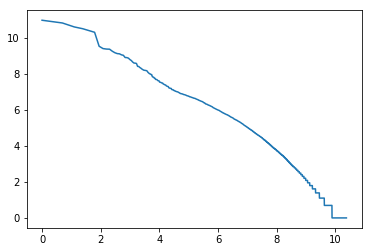

In [26]:
plot_freq_dist(freq_dist_org_eng)

Yes, we can obviously observe the Zipf's Law in these plots.

In [28]:
# Question 4
def heaps_law_check(in_file_name):
    """
    Plots the relationship between term occurance and vocabulary size in a given file
    :param in_file_name:
    :return void:
    """

    token_dict = dict()
    term_occ = []
    vocab_size = []

    with open(in_file_name) as file:
        for line in file:
            for token in line.split(' '):
                if token in token_dict.keys():
                    token_dict[token] += 1
                    term_occ.append(len(token_dict))
                    vocab_size.append(sum(token_dict.values()))
                elif token == '\n':
                    continue
                else:
                    token_dict[token] = 1
                    term_occ.append(len(token_dict))
                    vocab_size.append(sum(token_dict.values()))

    plt.plot(vocab_size, term_occ)
    plt.show()

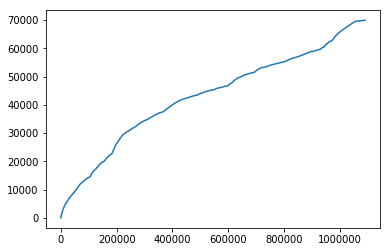

In [29]:
heaps_law_check(MORPH_SUBSET_DATA_TR)

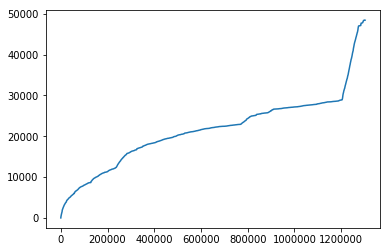

In [30]:
heaps_law_check(MORPH_SUBSET_DATA_ENG)

As it could be seen on the plots, when the corpus grows, generally, the number of new terms increases
dramatically at first, but then increases at a slower rate. (there is an exception on our English morph data after nearly 30Kst word due to our original corpus data.) Vocab size will always keep growing through time since there is always a possibility of inventing new words at this age. 

In [54]:
# Question 5
def get_token_occurrence(in_file_name, n):
    """
    Finds the list of words that occurs n times in the given file

    :param in_file_name:
    :param n:
    :return tok_occurence: Number of terms in input file that are occuring n times
    """

    tok_occurence = []

    freq_dist = get_token_freq_distribution(in_file_name)

    for element in freq_dist:
        if element[1] == n:
            tok_occurence.append((element[0].lower(), element[1]))

    tok_occurence = sorted(tok_occurence)

    return tok_occurence

In [55]:
get_token_occurrence(MORPH_SUBSET_DATA_TR, 200)

[('altä±+num', 200),
 ('bä±rak+verb+inf1', 200),
 ('nissan+noun', 200),
 ('olay+noun', 200)]

In [56]:
get_token_occurrence(MORPH_SUBSET_DATA_TR, 250)

[('iã§er+verb+prespart', 250),
 ('kapasite+noun+gen', 250),
 ('plan+noun+p3sg', 250)]

In [57]:
get_token_occurrence(MORPH_SUBSET_DATA_ENG, 200)

[('21+cd', 200), ('act+nn', 200), ('intellectual+jj', 200), ('until+in', 200)]

In [58]:
get_token_occurrence(MORPH_SUBSET_DATA_ENG, 250)

[('continue+vv+vvn', 250),
 ('draft+nn', 250),
 ('institute+np', 250),
 ('turkish+nn', 250)]

In [59]:
get_token_occurrence(SURFACE_DATA_TR, 200)

[('27', 200), ('gã¶rã¼åÿ', 200), ('konularda', 200)]

In [60]:
get_token_occurrence(SURFACE_DATA_TR, 250)

[('kullanä±lan', 250), ('sanayi', 250), ('ã¼retim', 250)]

In [61]:
get_token_occurrence(SURFACE_DATA_ENG, 200)

[('affiliates', 200), ('crime', 200), ('develop', 200), ('rear', 200)]

In [62]:
get_token_occurrence(SURFACE_DATA_ENG, 250)

[('expression', 250), ('institute', 250), ('programme', 250)]

In [74]:
# Question 6a
def find_lines_in_file(in_file_name, string):
    """
    Prints all the lines in which string occurs in the input file
    :param in_file_name:
    :param string:

    :return count: Number of lines containing the string
    """
    count = 0

    with open(in_file_name) as file:
        for line in file:
            for token in line.split(' '):
                if string == token[:len(token)-len(string)]:
                    print(line)
                    count += 1
                    break

    return count

In [75]:
find_lines_in_file(MORPH_SUBSET_DATA_ENG, string='cat')

domestic+NN cat+NN 

house+NN cat+NN 

angora+NN cat+NN 

big+JJ cat+NN 

cat+VV 

cat+NN food+NN 

cat+NN chow+NN 

cat+VV 

cat+VV 

cat+VV 

cat+VV 

cat+VV 

it+PP be+VBZ enough+JJ to+TO make+VV a+DT cat+NN lough+NN 

domestic+NN cat+NN 

house+NN cat+NN 

angora+NN cat+NN 

big+JJ cat+NN 

cat+VV 

cat+NN food+NN 

cat+NN chow+NN 



20

In [76]:
find_lines_in_file(SURFACE_DATA_ENG, string='cat')

Turkey's main imports from the Community include sugar , live cattle , food preparations , wheat and oils .

It consists of inspection and monitoring of samples randomly taken from cattle which died or were slaughtered after showing neurological symptoms , and cattle slaughtered at 30 months and above .

milk production per cattle in such countries is 5,000 - 6,000 kg / lactation , while 1,400 - 1,500 kg in Turkey .

according to the statistics of 1998 , animals of low - yield domestic species make up 41.7 % of the total cattle population , and 97 % of the total sheep population .

the figure is estimated to be around 1.3 million head of cattle in 2000 .

moreover , within the framework of improving the overall quality of breeding cattle in Turkey , during the 1987 - 1999 period a total of 342,608 head of breeding cattle were imported and distributed to breeders , of which 51,586 head were imported and distributed during 1996 - 1999 .

in order to meet the high quality raw material req

14

In [77]:
find_lines_in_file(MORPH_SUBSET_DATA_TR, string='araba')

araba+Noun sayÄ±+Noun+P3sg 47.9+Num 50.5+Num 53.2+Num 57.1+Num 60.5+Num 

araba+Noun sayÄ±+Noun+P3sg .+Punc 

araba+Noun sayÄ±+Noun+P3sg 50,5+Num 53,2+Num 57,1+Num 60,5+Num 63,3+Num g+Noun 

araba+Noun sayÄ±+Noun+P3sg :+Punc binek+Noun araba+Noun+P3sg :+Punc yolcu+Noun taÅŸÄ±+Verb+Pass+Inf2+P3sg maksat+Noun+With ol+Verb+PresPart ve+Conj (+Punc sÃ¼rÃ¼cÃ¼+Noun dahil+Noun )+Punc en+Adverb fazla+Adj dokuz+Num kiÅŸi+Noun otur+Verb+FutPart ÅŸekil+Noun+Loc tasarla+Verb+Pass+PresPart ,+Punc motorsiklet+Noun hariÃ§+Noun+P3sg+Loc+Rel motor+Noun+With kara+Noun taÅŸÄ±t+Noun+A3pl+P3sg .+Punc 

araba+Noun sayÄ±+Noun+P3sg 55.8+Num 58.9+Num 61.4+Num 65.5+Num 66.1+Num 

bay+Noun kocaman+Adj ,+Punc bir+Num araba+Noun kaza+Noun+P3sg neden+Noun+P3sg+Ins hafÄ±za+Noun kayÄ±p+Adj+P3sg+Dat uÄŸra+Verb+PastPart+P3sg+Acc kabul+Noun et+Verb+Inf1+Ins beraber+PostpPCIns olay+Noun zaman+Noun+P3sg+Loc hiÃ§bir+Det tecavÃ¼z+Noun ya+Conj da+Conj iÅŸkence+Noun olay+Noun+P3sg anÄ±msa+Verb+Neg+PastPart+P3sg+Acc belir+Verb+

103

In [78]:
find_lines_in_file(SURFACE_DATA_TR, string='araba')

Bu nedenle , binek arabasÄ± terimi , en fazla dokuz oturma yeri olmak ÅŸartÄ±yla , mikro arabalarÄ± ( sÃ¼rmek iÃ§in ehliyet gerekmeyen Ã§ok kÃ¼Ã§Ã¼k arabalar ) , taksileri ve kiralÄ±k binek arabalarÄ±nÄ± da kapsar .

Bu nedenle , binek arabasÄ± terimi , en fazla dokuz oturma yeri olmak ÅŸartÄ±yla , mikro arabalarÄ± ( sÃ¼rmek iÃ§in ehliyet gerekmeyen Ã§ok kÃ¼Ã§Ã¼k arabalar ) , taksileri ve kiralÄ±k binek arabalarÄ±nÄ± da kapsar .

ganimet de ele geÃ§irdi ve arabasÄ±na atlayarak , takipten kaÃ§mayÄ± baÅŸardÄ± .

Bu Ã§erÃ§evede binek araba ifadesi , mikro - arabalarÄ± ( sÃ¼rmek iÃ§in ehliyet gerekmeyen ) , 10 kiÅŸiden az kiÅŸilik yerleri olmasÄ± kaydÄ±yla , kiralÄ±k taksi ve arabalarÄ± iÃ§erir .

Bu Ã§erÃ§evede binek araba ifadesi , mikro - arabalarÄ± ( kullanmak iÃ§in izin gerekmeyen ) , 10 kiÅŸiden az kiÅŸilik yerleri olmasÄ± kaydÄ±yla , kiralÄ±k taksi ve arabalarÄ± iÃ§erir .

Bu Ã§erÃ§evede binek araba ifadesi , mikro - arabalarÄ± ( sÃ¼rmek iÃ§in ehliyet gerekmeyen ) , 10 kiÅŸiden az y

6

In [45]:
def find_tokens_in_file(in_file_name, tag):
    """
    Prints all the tokens in the file that are labelled with the tag.
    :param in_file_name:
    :param string:

    :return token_count: Number of tokens with the specified tag
    """

    token_count = 0

    with open(in_file_name) as file:
        for line in file:
            for token in line.split(' '):
                if tag == token[len(token)-len(tag):]:
                    print(token)
                    token_count += 1

    return token_count

In [82]:
find_tokens_in_file(MORPH_SUBSET_DATA_ENG, tag='VV')

see+VV
align+VV
help+VV
bring+VV
get+VV
establish+VV
achieve+VV
introduce+VV
take+VV
succeed+VV
put+VV
derive+VV
enhance+VV
take+VV
waste+VV
bring+VV
ensure+VV
draw+VV
get+VV
rise+VV
concern+VV
overcome+VV
promote+VV
meet+VV
open+VV
attract+VV
build+VV
operate+VV
transfer+VV
introduce+VV
cope+VV
evaluate+VV
achieve+VV
draw+VV
pose+VV
improve+VV
increase+VV
provide+VV
call+VV
deal+VV
activate+VV
conclude+VV
implement+VV
play+VV
redress+VV
fall+VV
achieve+VV
align+VV
bring+VV
bring+VV
require+VV
ensure+VV
privatise+VV
control+VV
expand+VV
meet+VV
assess+VV
respect+VV
renounce+VV
conduct+VV
participate+VV
remain+VV
comply+VV
assess+VV
deduct+VV
substantiate+VV
contain+VV
operate+VV
compensate+VV
eliminate+VV
begin+VV
reflect+VV
cooperate+VV
adopt+VV
assess+VV
apply+VV
conceal+VV
meet+VV
assess+VV
lag+VV
catch+VV
control+VV
make+VV
depend+VV
handle+VV
need+VV
know+VV
embrace+VV
hold+VV
see+VV
share+VV
draw+VV
prepare+VV
continue+VV
make+VV
enable+VV
acquire+VV
withstand+VV
run+VV
make+VV
e

form+VV
establish+VV
open+VV
commit+VV
encounter+VV
seek+VV
participate+VV
close+VV
hold+VV
comprise+VV
decide+VV
deprive+VV
close+VV
remedy+VV
register+VV
jeopardize+VV
appear+VV
exclude+VV
prohibit+VV
provide+VV
benefit+VV
train+VV
teach+VV
draft+VV
inter+VV
voice+VV
join+VV
see+VV
gender+VV
guarantee+VV
recognize+VV
attend+VV
enjoy+VV
eliminate+VV
comply+VV
prevent+VV
improve+VV
strike+VV
obtain+VV
strike+VV
organize+VV
bargain+VV
strike+VV
sign+VV
receive+VV
broadcast+VV
contradict+VV
stop+VV
create+VV
recognize+VV
provide+VV
lift+VV
improve+VV
improve+VV
evaluate+VV
return+VV
return+VV
see+VV
protect+VV
justify+VV
encourage+VV
work+VV
improve+VV
continue+VV
build+VV
provide+VV
promote+VV
introduce+VV
lift+VV
move+VV
impinge+VV
torture+VV
torture+VV
apply+VV
face+VV
face+VV
honour+VV
act+VV
foster+VV
appear+VV
express+VV
achieve+VV
take+VV
encourage+VV
work+VV
improve+VV
put+VV
open+VV
enable+VV
enjoy+VV
combat+VV
need+VV
prevent+VV
reflect+VV
pursue+VV
strengthen+VV
enable+VV
over

go+VV
fire+VV
know+VV
remember+VV
remember+VV
see+VV
disperse+VV
identify+VV
deal+VV
reflect+VV
read+VV
remember+VV
Ä°dil+VV
create+VV
happen+VV
tarnish+VV
realize+VV
inform+VV
investigate+VV
act+VV
attend+VV
commit+VV
discontinue+VV
fire+VV
do+VV
remember+VV
conduct+VV
examine+VV
express+VV
sign+VV
sign+VV
commence+VV
transfer+VV
carry+VV
protest+VV
open+VV
run+VV
see+VV
protest+VV
see+VV
take+VV
kill+VV
disperse+VV
take+VV
bring+VV
hear+VV
stop+VV
make+VV
preserve+VV
go+VV
see+VV
indemnify+VV
require+VV
indemnify+VV
safeguard+VV
investigate+VV
appeal+VV
institute+VV
initiate+VV
proceed+VV
apply+VV
drop+VV
lodge+VV
discontinue+VV
hold+VV
order+VV
pay+VV
reimburse+VV
rule+VV
hold+VV
limit+VV
impute+VV
disagree+VV
make+VV
further+VV
save+VV
effect+VV
prevent+VV
protest+VV
stop+VV
see+VV
leave+VV
disperse+VV
return+VV
restore+VV
intervene+VV
put+VV
try+VV
avoid+VV
disperse+VV
believe+VV
kill+VV
cast+VV
achieve+VV
tear+VV
support+VV
disperse+VV
identify+VV
fulfill+VV
protect+VV
prosecute+

provide+VV
conduct+VV
make+VV
conduct+VV
establish+VV
branch+VV
take+VV
conduct+VV
seem+VV
make+VV
provide+VV
realize+VV
direct+VV
open+VV
finance+VV
exceed+VV
pay+VV
achieve+VV
notify+VV
perform+VV
deal+VV
obtain+VV
utilize+VV
finance+VV
exceed+VV
register+VV
grant+VV
extend+VV
cover+VV
conclude+VV
conform+VV
cease+VV
take+VV
take+VV
declare+VV
present+VV
establish+VV
make+VV
perform+VV
establish+VV
open+VV
receive+VV
conduct+VV
enable+VV
operate+VV
obtain+VV
take+VV
train+VV
meet+VV
establish+VV
issue+VV
ensure+VV
publish+VV
protect+VV
obtain+VV
elapse+VV
fulfill+VV
apply+VV
say+VV
contain+VV
increase+VV
contain+VV
prepare+VV
make+VV
establish+VV
make+VV
include+VV
establish+VV
make+VV
establish+VV
prepare+VV
bring+VV
accede+VV
provide+VV
inform+VV
cooperate+VV
establish+VV
make+VV
represent+VV
know+VV
handle+VV
ensure+VV
put+VV
complete+VV
set+VV
institutionalize+VV
develop+VV
increase+VV
meet+VV
employ+VV
train+VV
complete+VV
improve+VV
legalize+VV
handle+VV
ensure+VV
put+VV
make+V

locate+VV
put+VV
try+VV
ambush+VV
run+VV
surrender+VV
call+VV
make+VV
lower+VV
remember+VV
remember+VV
hear+VV
fire+VV
remember+VV
recognize+VV
know+VV
see+VV
determine+VV
carry+VV
protect+VV
arrest+VV
escape+VV
say+VV
obey+VV
fire+VV
make+VV
kill+VV
hit+VV
see+VV
observe+VV
pinpoint+VV
visit+VV
identify+VV
interview+VV
interview+VV
answer+VV
attend+VV
find+VV
answer+VV
remember+VV
conclude+VV
identify+VV
carry+VV
investigate+VV
meet+VV
examine+VV
make+VV
sign+VV
disagree+VV
ask+VV
sign+VV
answer+VV
bring+VV
transfer+VV
appear+VV
make+VV
suggest+VV
advise+VV
report+VV
investigate+VV
decide+VV
conduct+VV
decide+VV
prosecute+VV
issue+VV
prosecute+VV
investigate+VV
prosecute+VV
apply+VV
see+VV
endanger+VV
lodge+VV
see+VV
bring+VV
make+VV
maintain+VV
ensure+VV
protect+VV
show+VV
compensate+VV
claim+VV
bring+VV
allow+VV
bring+VV
hold+VV
award+VV
declare+VV
exhaust+VV
equate+VV
render+VV
avail+VV
exhaust+VV
open+VV
bring+VV
redress+VV
identify+VV
see+VV
see+VV
conduct+VV
lead+VV
see+VV
seek+

complete+VV
simplify+VV
waste+VV
strengthen+VV
change+VV
prepare+VV
transpose+VV
implement+VV
ensure+VV
achieve+VV
trade+VV
trade+VV
eliminate+VV
adopt+VV
protect+VV
provide+VV
protect+VV
draft+VV
transpose+VV
implement+VV
test+VV
transpose+VV
implement+VV
align+VV
transpose+VV
implement+VV
strengthen+VV
transpose+VV
implement+VV
transpose+VV
implement+VV
ensure+VV
continue+VV
encourage+VV
develop+VV
continue+VV
meet+VV
check+VV
facilitate+VV
initiate+VV
conclude+VV
conclude+VV
continue+VV
continue+VV
ensure+VV
complete+VV
automate+VV
continue+VV
prevent+VV
suppress+VV
punish+VV
start+VV
prevent+VV
continue+VV
appoint+VV
make+VV
build+VV
participate+VV
continue+VV
start+VV
align+VV
take+VV
assume+VV
provide+VV
implement+VV
abuse+VV
exploit+VV
afford+VV
include+VV
ensure+VV
take+VV
ensure+VV
establish+VV
fight+VV
reflect+VV
join+VV
incorporate+VV
depend+VV
set+VV
continue+VV
form+VV
form+VV
fight+VV
fight+VV
perform+VV
complete+VV
combat+VV
benefit+VV
enter+VV
enter+VV
like+VV
sign+VV
i

abandon+VV
develop+VV
improve+VV
refrain+VV
refrain+VV
align+VV
ensure+VV
include+VV
review+VV
eliminate+VV
ensure+VV
ensure+VV
continue+VV
stabilize+VV
focus+VV
develop+VV
ensure+VV
strengthen+VV
provide+VV
provide+VV
present+VV
issue+VV
obtain+VV
facilitate+VV
provide+VV
align+VV
harmonize+VV
get+VV
align+VV
establish+VV
align+VV
engage+VV
do+VV
exclude+VV
apply+VV
align+VV
maintain+VV
adopt+VV
align+VV
harmonize+VV
adopt+VV
encourage+VV
establish+VV
fulfill+VV
establish+VV
see+VV
improve+VV
constitute+VV
establish+VV
redress+VV
deal+VV
upgrade+VV
see+VV
lift+VV
continue+VV
modernize+VV
liberalize+VV
streamline+VV
develop+VV
bring+VV
produce+VV
comply+VV
comply+VV
align+VV
ensure+VV
inter+VV
ensure+VV
tackle+VV
perform+VV
obtain+VV
rule+VV
complete+VV
ensure+VV
align+VV
set+VV
provide+VV
adopt+VV
establish+VV
implement+VV
total+VV
serve+VV
include+VV
constitute+VV
strengthen+VV
become+VV
fight+VV
see+VV
assist+VV
become+VV
start+VV
build+VV
take+VV
facilitate+VV
serve+VV
support+VV
s

buy+VV
mean+VV
direct+VV
cause+VV
veto+VV
mean+VV
mean+VV
mean+VV
mean+VV
mean+VV
mean+VV
mean+VV
identify+VV
mean+VV
create+VV
mean+VV
mean+VV
mean+VV
use+VV
mean+VV
symbol+VV
mean+VV
mean+VV
mean+VV
mean+VV
mean+VV
mean+VV
direct+VV
cause+VV
symbol+VV
mean+VV
mean+VV
receive+VV
mean+VV
impose+VV
mean+VV
mean+VV
permit+VV
receive+VV
purchase+VV
acquire+VV
complete+VV
own+VV
apply+VV
permit+VV
cooperate+VV
apply+VV
complete+VV
challenge+VV
prevent+VV
use+VV
overcome+VV
use+VV
save+VV
overcome+VV
remain+VV
profit+VV
use+VV
preserve+VV
retain+VV
keep+VV
do+VV
need+VV
take+VV
perform+VV
deliver+VV
pay+VV
remain+VV
take+VV
anticipate+VV
comply+VV
complete+VV
defer+VV
proceed+VV
terminate+VV
waive+VV
procure+VV
hold+VV
dispose+VV
direct+VV
represent+VV
participate+VV
decide+VV
vote+VV
warrant+VV
undertake+VV
procure+VV
permit+VV
suffer+VV
subsist+VV
constitute+VV
make+VV
cause+VV
constitute+VV
make+VV
affect+VV
prejudice+VV
bring+VV
operate+VV
reduce+VV
undertake+VV
waive+VV
preclude+VV
ent

contribute+VV
ease+VV
experience+VV
remedy+VV
qualify+VV
lift+VV
restrict+VV
define+VV
address+VV
take+VV
tackle+VV
overcome+VV
continue+VV
support+VV
achieve+VV
conclude+VV
take+VV
enhance+VV
cope+VV
increase+VV
exit+VV
improve+VV
bring+VV
accession+VV
maintain+VV
play+VV
exert+VV
play+VV
decline+VV
peg+VV
achieve+VV
reduce+VV
increase+VV
enter+VV
reduce+VV
lower+VV
improve+VV
take+VV
remain+VV
benefit+VV
cost+VV
allow+VV
prepare+VV
impede+VV
finance+VV
hamper+VV
assess+VV
cope+VV
fulfill+VV
make+VV
invest+VV
improve+VV
adapt+VV
take+VV
gain+VV
give+VV
implement+VV
match+VV
accelerate+VV
improve+VV
increase+VV
privatise+VV
reform+VV
reduce+VV
force+VV
increase+VV
align+VV
provide+VV
fulfill+VV
face+VV
improve+VV
trade+VV
shift+VV
peg+VV
reach+VV
cope+VV
transform+VV
continue+VV
continue+VV
increase+VV
provide+VV
assume+VV
create+VV
add+VV
adopt+VV
implement+VV
show+VV
go+VV
apply+VV
offer+VV
exist+VV
move+VV
seek+VV
adopt+VV
remove+VV
trade+VV
ensure+VV
harmonize+VV
strengthen+VV
adop

develop+VV
implement+VV
attain+VV
implement+VV
inter+VV
oversee+VV
need+VV
continue+VV
align+VV
improve+VV
detect+VV
begin+VV
conclude+VV
participate+VV
require+VV
submit+VV
encounter+VV
establish+VV
enhance+VV
improve+VV
bear+VV
provide+VV
use+VV
attend+VV
train+VV
ensure+VV
enable+VV
improve+VV
improve+VV
develop+VV
establish+VV
develop+VV
increase+VV
meet+VV
return+VV
see+VV
implement+VV
provide+VV
ensure+VV
finance+VV
become+VV
use+VV
revise+VV
bring+VV
ratify+VV
appoint+VV
improve+VV
require+VV
coordinate+VV
improve+VV
appoint+VV
approve+VV
approve+VV
appoint+VV
agree+VV
synergise+VV
contribute+VV
receive+VV
promote+VV
disseminate+VV
increase+VV
ensure+VV
make+VV
increase+VV
enable+VV
fulfill+VV
ensure+VV
continue+VV
contribute+VV
develop+VV
improve+VV
converge+VV
uphold+VV
ensure+VV
ensure+VV
continue+VV
consolidate+VV
cope+VV
determine+VV
monitor+VV
evaluate+VV
implement+VV
allow+VV
take+VV
enable+VV
make+VV
ensure+VV
undertake+VV
pursue+VV
allow+VV
respond+VV
gain+VV
participat

see+VV
see+VV
operate+VV
press+VV
hold+VV
make+VV
do+VV
use+VV
damage+VV
connect+VV
see+VV
turn+VV
hold+VV
turn+VV
pair+VV
make+VV
put+VV
refer+VV
hold+VV
put+VV
hold+VV
connect+VV
find+VV
connect+VV
start+VV
flash+VV
start+VV
flash+VV
start+VV
play+VV
connect+VV
pair+VV
connect+VV
follow+VV
pair+VV
make+VV
connect+VV
use+VV
play+VV
pause+VV
skip+VV
pause+VV
tap+VV
resume+VV
answer+VV
pause+VV
resume+VV
continue+VV
skip+VV
continue+VV
skip+VV
hold+VV
hold+VV
work+VV
connect+VV
make+VV
see+VV
hear+VV
increase+VV
ensure+VV
make+VV
ensure+VV
repeat+VV
need+VV
see+VV
avoid+VV
shorten+VV
affect+VV
degrade+VV
expose+VV
tear+VV
perform+VV
assume+VV
damage+VV
consult+VV
get+VV
communicate+VV
support+VV
implement+VV
support+VV
hear+VV
sound+VV
support+VV
work+VV
find+VV
see+VV
meet+VV
address+VV
congratulate+VV
benefit+VV
establish+VV
strengthen+VV
make+VV
catch+VV
mobilize+VV
see+VV
assume+VV
find+VV
pave+VV
recognize+VV
assume+VV
play+VV
facilitate+VV
recognize+VV
influence+VV
find+VV
diagnos

create+VV
compose+VV
pen+VV
indite+VV
compose+VV
pen+VV
indite+VV
dance+VV
dance+VV
playact+VV
dissemble+VV
pretend+VV
dissemble+VV
pretend+VV
dissemble+VV
pretend+VV
sham+VV
feign+VV
rehearse+VV
practise+VV
practice+VV
improvise+VV
extemporize+VV
extemporize+VV
improvise+VV
extemporize+VV
extemporize+VV
reproduce+VV
imitate+VV
bring+VV
give+VV
bring+VV
give+VV
bring+VV
give+VV
bring+VV
give+VV
invite+VV
ask+VV
stimulate+VV
shake+VV
excite+VV
arouse+VV
sex+VV
excite+VV
wind+VV
agitate+VV
rouse+VV
commove+VV
excite+VV
impress+VV
disturb+VV
trouble+VV
detest+VV
abhor+VV
loathe+VV
abominate+VV
execrate+VV
infuriate+VV
exasperate+VV
incense+VV
annoy+VV
rag+VV
get+VV
get+VV
irritate+VV
rile+VV
nark+VV
nettle+VV
gravel+VV
vex+VV
chafe+VV
devil+VV
annoy+VV
rag+VV
get+VV
get+VV
irritate+VV
rile+VV
nark+VV
nettle+VV
gravel+VV
vex+VV
chafe+VV
devil+VV
annoy+VV
rag+VV
get+VV
get+VV
irritate+VV
rile+VV
nark+VV
nettle+VV
gravel+VV
vex+VV
chafe+VV
devil+VV
confuse+VV
flurry+VV
disconcert+VV
embarras

call+VV
call+VV
call+VV
call+VV
call+VV
call+VV
call+VV
call+VV
call+VV
call+VV
call+VV
call+VV
callous+VV
calm+VV
calumniate+VV
calumniate+VV
camber+VV
camouflage+VV
camp+VV
camp+VV
camp+VV
camp+VV
campaign+VV
campaign+VV
campaign+VV
campaign+VV
canalize+VV
canalize+VV
canalize+VV
cancel+VV
cancel+VV
cancel+VV
cancel+VV
cancel+VV
canker+VV
canker+VV
canker+VV
canker+VV
cannibalize+VV
cannon+VV
cannon+VV
cannon+VV
cannon+VV
cannon+VV
cannonade+VV
cannonade+VV
bone+VV
canoe+VV
canonize+VV
cant+VV
cant+VV
cant+VV
cant+VV
cant+VV
canter+VV
canter+VV
canton+VV
canton+VV
canvass+VV
canvass+VV
canvass+VV
canvass+VV
canvass+VV
canvass+VV
canvass+VV
canvass+VV
capacitate+VV
caparison+VV
caparison+VV
caper+VV
caper+VV
caper+VV
capitalize+VV
capitalize+VV
capitalize+VV
capitol+VV
capitulate+VV
capitulate+VV
capricorn+VV
capsize+VV
capsize+VV
capsize+VV
caption+VV
caption+VV
capture+VV
capture+VV
capture+VV
capture+VV
capture+VV
capture+VV
capture+VV
caravan+VV
carbonate+VV
card+VV
card+VV
card+V

etch+VV
etch+VV
etch+VV
etch+VV
eternalize+VV
etiolate+VV
eucharist+VV
euchre+VV
euchre+VV
euchre+VV
evacuate+VV
evade+VV
evade+VV
evade+VV
evade+VV
evade+VV
evanesce+VV
evanesce+VV
evaporate+VV
evaporate+VV
eventuate+VV
evert+VV
evert+VV
evict+VV
evict+VV
evidence+VV
evince+VV
evince+VV
evince+VV
evirate+VV
eviscerate+VV
eviscerate+VV
exact+VV
exact+VV
exact+VV
exaggerate+VV
exaggerate+VV
exaggerate+VV
exalt+VV
examine+VV
exasperate+VV
exasperate+VV
excerpt+VV
excerpt+VV
excerpt+VV
excise+VV
excite+VV
excite+VV
excite+VV
excogitate+VV
excommunicate+VV
excoriate+VV
excoriate+VV
excoriate+VV
excruciate+VV
excruciate+VV
excruciate+VV
exculpate+VV
excuse+VV
excuse+VV
excuse+VV
excuse+VV
excuse+VV
execrate+VV
execrate+VV
exemplify+VV
exemplify+VV
exemplify+VV
exemplify+VV
exempt+VV
exempt+VV
exfoliate+VV
exhale+VV
exhale+VV
exhibit+VV
exhibit+VV
exhibit+VV
exhort+VV
exhort+VV
exhort+VV
exhort+VV
exhume+VV
exile+VV
exile+VV
exit+VV
exit+VV
exonerate+VV
exonerate+VV
exonerate+VV
exorcise+VV


irritate+VV
irrupt+VV
issue+VV
issue+VV
issue+VV
italicize+VV
itch+VV
itch+VV
palm+VV
itemize+VV
itinerate+VV
itinerate+VV
make+VV
jabber+VV
jabber+VV
jabber+VV
jabber+VV
jack+VV
jack+VV
jack+VV
jacket+VV
jackknife+VV
jackknife+VV
jackknife+VV
jade+VV
jade+VV
jade+VV
jag+VV
jag+VV
jag+VV
jag+VV
jam+VV
jam+VV
jam+VV
jam+VV
jam+VV
jam+VV
jangle+VV
jangle+VV
jape+VV
jape+VV
jape+VV
jape+VV
jar+VV
jar+VV
jar+VV
jar+VV
jar+VV
jar+VV
jargon+VV
jargon+VV
jaunt+VV
jaw+VV
jaw+VV
jaw+VV
jaw+VV
jaw+VV
jaw+VV
jaw+VV
jaw+VV
jaywalk+VV
jazz+VV
jazz+VV
jazz+VV
jazz+VV
jazz+VV
jeer+VV
jeer+VV
jeer+VV
jell+VV
jell+VV
jellify+VV
jelly+VV
jemmy+VV
jeopardize+VV
jeopardize+VV
jerk+VV
jerk+VV
jerk+VV
jerk+VV
jerk+VV
jerk+VV
jess+VV
jess+VV
jest+VV
jest+VV
jettison+VV
jettison+VV
jettison+VV
jettison+VV
jettison+VV
jettison+VV
jewel+VV
jewel+VV
jewel+VV
jewel+VV
jezebel+VV
jib+VV
jib+VV
jib+VV
jibe+VV
jibe+VV
jibe+VV
jibe+VV
jibe+VV
jibe+VV
jibe+VV
jig+VV
jig+VV
jig+VV
jig+VV
jig+VV
jig+VV
jig+VV
jig+VV
jig

protect+VV
protect+VV
protest+VV
protest+VV
protest+VV
protest+VV
protest+VV
protract+VV
protract+VV
protrude+VV
protrude+VV
prove+VV
provide+VV
provision+VV
provoke+VV
provoke+VV
provoke+VV
provoke+VV
prowl+VV
prowl+VV
prune+VV
prune+VV
pry+VV
pry+VV
pry+VV
pry+VV
crawl+VV
publicize+VV
publicize+VV
publicize+VV
publish+VV
publish+VV
publish+VV
pucker+VV
puddle+VV
puddle+VV
puddle+VV
puddle+VV
puddle+VV
puddle+VV
puddle+VV
puff+VV
puff+VV
puff+VV
puff+VV
puff+VV
puff+VV
puff+VV
pug+VV
pug+VV
pug+VV
puke+VV
pule+VV
pull+VV
pull+VV
pull+VV
pull+VV
pull+VV
pull+VV
pull+VV
pull+VV
leg+VV
pull+VV
pull+VV
pull+VV
pull+VV
pull+VV
pull+VV
pull+VV
pull+VV
pullulate+VV
pulp+VV
pulp+VV
pulp+VV
pulp+VV
pulp+VV
pulp+VV
pulp+VV
pulp+VV
pulp+VV
pulp+VV
pulp+VV
pulp+VV
star+VV
pulse+VV
pulverize+VV
pulverize+VV
pulverize+VV
pump+VV
pun+VV
pun+VV
pun+VV
punchball+VV
punctuate+VV
punctuate+VV
punctuate+VV
punctuate+VV
puncture+VV
punish+VV
punish+VV
punish+VV
punish+VV
punt+VV
punt+VV
punt+VV
punt+VV
pu

slog+VV
slop+VV
slop+VV
slop+VV
slop+VV
slop+VV
slop+VV
slop+VV
slop+VV
slop+VV
slope+VV
slope+VV
slope+VV
slope+VV
slope+VV
slosh+VV
slosh+VV
slosh+VV
slosh+VV
slosh+VV
slosh+VV
slosh+VV
slosh+VV
slot+VV
slot+VV
slot+VV
slot+VV
slot+VV
slouch+VV
slouch+VV
slouch+VV
slough+VV
slough+VV
slough+VV
slough+VV
slough+VV
slough+VV
slough+VV
slough+VV
slug+VV
slug+VV
slug+VV
slug+VV
slug+VV
slug+VV
slug+VV
slug+VV
slug+VV
slug+VV
sluice+VV
sluice+VV
sluice+VV
sluice+VV
slum+VV
slum+VV
slum+VV
slum+VV
slum+VV
slum+VV
slur+VV
slur+VV
slur+VV
slur+VV
slur+VV
slur+VV
slur+VV
slur+VV
slur+VV
slur+VV
slur+VV
slur+VV
slurp+VV
slurp+VV
slush+VV
slush+VV
slush+VV
slush+VV
slush+VV
slush+VV
slush+VV
slush+VV
slush+VV
smarten+VV
smarten+VV
smarten+VV
smash+VV
smash+VV
smash+VV
smash+VV
smear+VV
smear+VV
smirch+VV
smirk+VV
smirk+VV
smirk+VV
smite+VV
smock+VV
smock+VV
smock+VV
smoulder+VV
smoulder+VV
smoulder+VV
smother+VV
smother+VV
smother+VV
smother+VV
smother+VV
smother+VV
smoulder+VV
smoulder+VV
smou

void+VV
void+VV
volley+VV
volley+VV
volunteer+VV
volunteer+VV
volunteer+VV
volunteer+VV
volunteer+VV
vomit+VV
vomit+VV
voodoo+VV
voodoo+VV
vote+VV
vote+VV
vote+VV
vote+VV
vote+VV
vouch+VV
vouch+VV
vouch+VV
vouchsafe+VV
vouchsafe+VV
do+VV
vow+VV
vow+VV
voyage+VV
vulcanize+VV
wad+VV
waddle+VV
waddle+VV
wade+VV
wade+VV
wade+VV
wade+VV
wade+VV
wade+VV
wade+VV
wafer+VV
wafer+VV
wafer+VV
wafer+VV
wafer+VV
waffle+VV
waft+VV
waft+VV
waft+VV
tongue+VV
wag+VV
wage+VV
wager+VV
waggon+VV
waggon+VV
wagon+VV
wagon+VV
wail+VV
wail+VV
wail+VV
wainscot+VV
wait+VV
wait+VV
wait+VV
wait+VV
wait+VV
wait+VV
wait+VV
waive+VV
waken+VV
waken+VV
wale+VV
walk+VV
walk+VV
walk+VV
walk+VV
walk+VV
walk+VV
wall+VV
wall+VV
wallop+VV
wallop+VV
wallop+VV
wallop+VV
wallpaper+VV
wallpaper+VV
waltz+VV
wan+VV
wander+VV
wander+VV
wangle+VV
wangle+VV
wangle+VV
wangle+VV
wangle+VV
wank+VV
wank+VV
want+VV
wanton+VV
wanton+VV
wanton+VV
wanton+VV
wanton+VV
war+VV
war+VV
warble+VV
warble+VV
ward+VV
ward+VV
ware+VV
ware+VV
warehous

respond+VV
center+VV
pore+VV
rivet+VV
take+VV
take+VV
impute+VV
ascribe+VV
recognize+VV
realize+VV
trace+VV
inquire+VV
enquire+VV
arrange+VV
order+VV
arrange+VV
order+VV
fingerspell+VV
spell+VV
order+VV
enjoin+VV
instruct+VV
saddle+VV
burden+VV
bespeak+VV
quest+VV
bespeak+VV
quest+VV
invoke+VV
plead+VV
commune+VV
negociate+VV
negotiate+VV
negociate+VV
negotiate+VV
settle+VV
settle+VV
persuade+VV
win+VV
controvert+VV
contradict+VV
investigate+VV
inquire+VV
enquire+VV
telephone+VV
call+VV
dial+VV
telecommunicate+VV
invite+VV
forbid+VV
interdict+VV
proscribe+VV
veto+VV
disallow+VV
consent+VV
go+VV
disregard+VV
brush+VV
discount+VV
push+VV
disregard+VV
brush+VV
discount+VV
push+VV
disregard+VV
discount+VV
push+VV
countenance+VV
countenance+VV
authorize+VV
authorize+VV
dissent+VV
concur+VV
concur+VV
concur+VV
concur+VV
disapprove+VV
refute+VV
rebut+VV
refute+VV
rebut+VV
answer+VV
reply+VV
respond+VV
profess+VV
confess+VV
confess+VV
take+VV
take+VV
take+VV
attest+VV
attest+VV
certify+VV
evid

42484

In [83]:
find_tokens_in_file(MORPH_SUBSET_DATA_TR, tag='A3pl')

turunÃ§gil+Noun+A3pl
taviz+Noun+A3pl
hamle+Noun+A3pl
baÄŸlantÄ±+Noun+A3pl
lisans+Noun+A3pl
kural+Noun+A3pl
teklif+Noun+A3pl
gÃ¶rÃ¼ÅŸme+Noun+A3pl
gÃ¶rÃ¼ÅŸme+Noun+A3pl
sorun+Noun+A3pl
standart+Noun+A3pl
madde+Noun+A3pl
organizma+Noun+A3pl
eksik+Adj+Ness+A3pl
atÄ±k+Adj+A3pl
Ã§aba+Noun+A3pl
kurum+Noun+A3pl
sorumlu+Noun+Ness+A3pl
koridor+Noun+A3pl
Ã§alÄ±ÅŸ+Verb+Inf2+A3pl
Ã¼lke+Noun+A3pl
gÃ¶rÃ¼ÅŸme+Noun+A3pl
gÃ¶rÃ¼ÅŸme+Noun+A3pl
baÄŸlantÄ±+Noun+A3pl
sorun+Noun+A3pl
sÃ¶zleÅŸ+Verb+Inf2+A3pl
ÅŸebeke+Noun+A3pl
ilke+Noun+A3pl
konu+Noun+A3pl
santral+Noun+A3pl
tedbir+Noun+A3pl
yetkili+Noun+A3pl
dÃ¼zenle+Verb+Inf2+A3pl
reklam+Noun+A3pl
reklam+Noun+A3pl
sat+Verb+Inf3+A3pl
yÃ¶nerge+Noun+A3pl
taklit+Noun+A3pl
sat+Verb+Inf3+A3pl
sorun+Noun+A3pl
toplantÄ±+Noun+A3pl
toplantÄ±+Noun+A3pl
Ã¶ngÃ¶r+Verb+Prog2+Cop+A3pl
mÃ¼lahaza+Noun+A3pl
gerekÃ§e+Noun+A3pl
baÄŸlantÄ±+Noun+A3pl
belge+Noun+A3pl
ilaÃ§+Noun+A3pl
madde+Noun+A3pl
millet+Noun+A3pl
yetkili+Noun+A3pl
husus+Noun+A3pl
sorun+Noun+A3pl
hizmet+Noun+A3pl
ol+

bakan+Noun+A3pl
emlak+Noun+A3pl
kanun+Noun+A3pl
gÃ¼Ã§+Adj+Ness+A3pl
Ã§aba+Noun+A3pl
dÃ¼zenle+Verb+Inf2+A3pl
taraf+Noun+A3pl
mahkeme+Noun+A3pl
deÄŸiÅŸik+Adj+Ness+A3pl
hak+Noun+A3pl
deÄŸiÅŸik+Adj+Ness+A3pl
hak+Noun+A3pl
suÃ§+Noun+A3pl
bulun+Verb+PresPart+A3pl
hak+Noun+A3pl
hapishane+Noun+A3pl
mahkeme+Noun+A3pl
hak+Noun+A3pl
savcÄ±+Noun+A3pl
uygulama+Noun+A3pl
eksik+Adj+Ness+A3pl
kanÄ±t+Noun+A3pl
genÃ§+Noun+A3pl
Ã§ocuk+Noun+A3pl
karar+Noun+A3pl
hÃ¼kÃ¼m+Noun+A3pl
tedbir+Noun+A3pl
hÃ¼kÃ¼m+Noun+A3pl
baÅŸvuru+Noun+A3pl
karar+Noun+A3pl
tedbir+Noun+A3pl
sivil+Noun+A3pl
seminer+Noun+A3pl
seminer+Noun+A3pl
araÅŸtÄ±r+Verb+Inf2+A3pl
parti+Noun+A3pl
baÄŸÄ±ÅŸ+Noun+A3pl
sÄ±nÄ±r+Noun+A3pl
devlet+Noun+A3pl
veri+Noun+A3pl
Ã¼ye+Noun+A3pl
reform+Noun+A3pl
Ã¼ye+Noun+A3pl
Ã¼ye+Noun+A3pl
hak+Noun+A3pl
kuvvet+Noun+A3pl
karar+Noun+A3pl
kanun+Noun+A3pl
deÄŸiÅŸik+Adj+Ness+A3pl
hÃ¼rriyet+Noun+A3pl
dÃ¼zenle+Verb+Inf2+A3pl
ilerle+Verb+Inf2+A3pl
et+Verb+PresPart+A3pl
il+Noun+A3pl
deÄŸiÅŸik+Adj+Ness+A3pl
deÄŸiÅŸik+Adj

sahip+Noun+Cop+A3pl
ilgili+Noun+A3pl
baÅŸvur+Verb+Able+Aor+A3pl
fiil+Noun+A3pl
suÃ§+Noun+A3pl
ÅŸikayet+Noun+Agt+A3pl
et+Verb+Able+Aor+A3pl
o+Pron+A3pl
kovuÅŸtur+Verb+Pass+Able+Aor+A3pl
kiÅŸi+Noun+A3pl
makam+Noun+A3pl
hÃ¼kÃ¼m+Noun+A3pl
zarar+Noun+A3pl
hÃ¼kÃ¼m+Noun+A3pl
kararname+Noun+A3pl
yetki+Noun+A3pl
bu+Pron+A3pl
zarar+Noun+A3pl
yetki+Noun+A3pl
yetki+Noun+A3pl
hÃ¼kÃ¼m+Noun+A3pl
kararname+Noun+A3pl
iÅŸlem+Noun+A3pl
sun+Verb+Inf3+A3pl
imza+Noun+A3pl
temsilci+Noun+A3pl
temsilci+Noun+A3pl
paragraf+Noun+A3pl
giriÅŸim+Noun+A3pl
et+Verb+Past+A3pl
engel+Noun+A3pl
dava+Noun+A3pl
gÃ¼Ã§+Adj+Ness+A3pl
paragraf+Noun+A3pl
gÃ¼Ã§+Adj+Ness+A3pl
paragraf+Noun+A3pl
yetkili+Noun+A3pl
paragraf+Noun+A3pl
paragraf+Noun+A3pl
paragraf+Noun+A3pl
paragraf+Noun+A3pl
ÅŸart+Noun+A3pl
devlet+Noun+A3pl
hÃ¼kÃ¼m+Noun+A3pl
paragraf+Noun+A3pl
tartÄ±ÅŸ+Verb+Inf2+A3pl
kimse+Noun+A3pl
herkes+Pron+A3pl
niza+Noun+A3pl
paragraf+Noun+A3pl
kiÅŸi+Noun+A3pl
gÃ¼Ã§+Adj+Ness+A3pl
karÅŸÄ±laÅŸ+Verb+Prog2+Cop+A3pl
bu+Pron+A3pl
paragr

dÃ¼zenle+Verb+Inf2+A3pl
sektÃ¶r+Noun+A3pl
dÃ¼zenle+Verb+Inf2+A3pl
kuruluÅŸ+Noun+A3pl
bakanlÄ±k+Noun+A3pl
kuruluÅŸ+Noun+A3pl
banka+Noun+A3pl
il+Noun+A3pl
Ã§alÄ±ÅŸ+Verb+Inf2+A3pl
Ã¼lke+Noun+A3pl
Ã¶nlem+Noun+A3pl
uygulama+Noun+A3pl
hÃ¼kÃ¼m+Noun+A3pl
bakan+Noun+A3pl
uygulama+Noun+A3pl
destek+Noun+A3pl
kurum+Noun+A3pl
iÅŸletme+Noun+A3pl
uygulama+Noun+A3pl
teÅŸvik+Noun+A3pl
bakan+Noun+A3pl
firma+Noun+A3pl
il+Noun+A3pl
bÃ¶lge+Noun+A3pl
tedbir+Noun+A3pl
tebliÄŸ+Noun+A3pl
tebliÄŸ+Noun+A3pl
tebliÄŸ+Noun+A3pl
tebliÄŸ+Noun+A3pl
tebliÄŸ+Noun+A3pl
tebliÄŸ+Noun+A3pl
yeni+Adj+Ness+A3pl
gerek+Verb+PresPart+A3pl
destek+Noun+A3pl
fon+Noun+A3pl
uygulama+Noun+A3pl
uygulama+Noun+A3pl
devlet+Noun+A3pl
kural+Noun+A3pl
kural+Noun+A3pl
deÄŸiÅŸik+Adj+Ness+A3pl
Ã¼lke+Noun+A3pl
tedbir+Noun+A3pl
Ã§alÄ±ÅŸ+Verb+Inf2+A3pl
sektÃ¶r+Noun+A3pl
uygulama+Noun+A3pl
uygulama+Noun+A3pl
destek+Noun+A3pl
birim+Noun+A3pl
ne+Pron+A3pl
ne+Pron+A3pl
yatÄ±rÄ±m+Noun+A3pl
yatÄ±rÄ±m+Noun+A3pl
Ã§alÄ±ÅŸ+Verb+Inf2+A3pl
hal+Noun+A3pl
sanayi

Ã§alÄ±ÅŸ+Verb+Inf2+A3pl
kuruluÅŸ+Noun+A3pl
dÄ±ÅŸiÅŸleri+Noun+A3pl
Ã¶nlem+Noun+A3pl
et+Verb+Pass+Prog2+Cop+A3pl
yabancÄ±+Noun+A3pl
et+Verb+Pass+Able+Prog2+Cop+A3pl
muafiyet+Noun+A3pl
gÃ¶Ã§men+Noun+A3pl
geÃ§+Verb+Prog2+Cop+A3pl
hizmet+Noun+A3pl
sigorta+Noun+A3pl
sanatkar+Noun+A3pl
Ã§alÄ±ÅŸan+Noun+A3pl
sigorta+Noun+A3pl
yabancÄ±+Noun+A3pl
esas+Noun+A3pl
yeni+Adj+Ness+A3pl
sÃ¶zleÅŸme+Noun+A3pl
yabancÄ±+Noun+A3pl
esas+Noun+A3pl
bakan+Noun+A3pl
yatÄ±rÄ±m+Noun+A3pl
ol+Verb+PresPart+A3pl
sorun+Noun+A3pl
program+Noun+A3pl
suÃ§+Noun+A3pl
suÃ§+Noun+A3pl
suÃ§+Noun+A3pl
Ã§alÄ±ÅŸ+Verb+Inf2+A3pl
Ã¶nlem+Noun+A3pl
suÃ§+Noun+A3pl
silah+Noun+A3pl
bÄ±Ã§ak+Noun+A3pl
alet+Noun+A3pl
kurum+Noun+A3pl
suÃ§+Noun+A3pl
suÃ§+Noun+A3pl
millet+Noun+A3pl
bu+Pron+A3pl
bu+Pron+A3pl
iÅŸlem+Noun+A3pl
banka+Noun+A3pl
et+Verb+PresPart+A3pl
et+Verb+Pass+Neg+PresPart+A3pl
madde+Noun+A3pl
millet+Noun+A3pl
mÃ¼stahzar+Adj+A3pl
ecza+Noun+Agt+A3pl
eczane+Noun+A3pl
kuruluÅŸ+Noun+A3pl
strateji+Noun+A3pl
yeni+Adj+Ness+A3pl
sÃ¶zleÅŸme

Ã¶ncelik+Noun+A3pl
hedef+Noun+A3pl
bakan+Noun+A3pl
dÃ¼zenle+Verb+Inf2+A3pl
tarife+Noun+A3pl
tarife+Noun+A3pl
tÃ¼ket+Verb+Agt+A3pl
hedef+Noun+A3pl
deÄŸer+Noun+Acquire+Caus+Inf2+A3pl
hedef+Noun+A3pl
kanun+Noun+A3pl
dÃ¼zenle+Verb+Inf2+A3pl
dÃ¼zenle+Verb+Inf2+A3pl
kural+Noun+A3pl
eksik+Adj+Ness+A3pl
program+Noun+P3sg+Loc+Rel+A3pl
kaynak+Noun+A3pl
gÃ¶ster+Verb+Prog2+Cop+A3pl
kaynak+Noun+A3pl
bakan+Noun+A3pl
kÄ±ymet+Noun+A3pl
iÅŸlem+Noun+A3pl
yÃ¼kÃ¼m+Noun+With+Ness+A3pl
husus+Noun+A3pl
anlaÅŸma+Noun+A3pl
bakan+Noun+A3pl
hedef+Noun+A3pl
Ã§alÄ±ÅŸ+Verb+Inf2+A3pl
Ã¶nlem+Noun+A3pl
yÃ¶netmelik+Noun+A3pl
kurum+Noun+A3pl
kaynak+Noun+A3pl
tedbir+Noun+A3pl
belediye+Noun+A3pl
faaliyet+Noun+A3pl
hedef+Noun+A3pl
tedbir+Noun+A3pl
hÃ¼kÃ¼m+Noun+A3pl
proje+Noun+A3pl
proje+Noun+A3pl
hedef+Noun+A3pl
Ã¼lke+Noun+A3pl
taraf+Noun+A3pl
taraf+Noun+A3pl
Ã§alÄ±ÅŸ+Verb+Inf2+A3pl
alan+Noun+A3pl
proje+Noun+A3pl
Ã¼lke+Noun+A3pl
faaliyet+Noun+A3pl
tedbir+Noun+A3pl
otobÃ¼s+Noun+A3pl
imkan+Noun+A3pl
kriter+Noun+A3pl
rapor+No

azÄ±nlÄ±k+Noun+A3pl
et+Verb+Prog2+Cop+A3pl
bu+Pron+A3pl
bakan+Noun+A3pl
vakÄ±f+Noun+A3pl
vakÄ±f+Noun+A3pl
taÅŸÄ±n+Verb+Neg+Aor+A3pl
vakÄ±f+Noun+A3pl
karÅŸÄ±laÅŸ+Verb+Prog2+Cop+A3pl
vakÄ±f+Noun+A3pl
vakÄ±f+Noun+A3pl
bu+Pron+A3pl
seÃ§im+Noun+A3pl
karÅŸÄ±laÅŸ+Verb+Prog2+Cop+A3pl
gÃ¼Ã§+Adj+Ness+A3pl
hisset+Verb+Prog2+Cop+A3pl
et+Verb+Prog2+Cop+A3pl
tanÄ±m+Noun+A3pl
cemaat+Noun+A3pl
bekle+Verb+Prog2+Cop+A3pl
olay+Noun+A3pl
sorun+Noun+A3pl
ol+Verb+PresPart+A3pl
sorun+Noun+A3pl
dernek+Noun+A3pl
vakÄ±f+Noun+A3pl
alevi+Noun+A3pl
sorun+Noun+A3pl
mÃ¼lteci+Noun+A3pl
Ã§ocuk+Noun+A3pl
hak+Noun+A3pl
dernek+Noun+A3pl
hak+Noun+A3pl
ver+Verb+PresPart+A3pl
iÅŸlem+Noun+A3pl
yaptÄ±rÄ±m+Noun+A3pl
ÅŸart+Noun+A3pl
ÅŸart+Noun+A3pl
bakan+Noun+A3pl
azÄ±nlÄ±k+Noun+A3pl
ÅŸikayet+Noun+A3pl
sÃ¼ryani+Noun+A3pl
olay+Noun+A3pl
karÅŸÄ±laÅŸ+Verb+Prog2+Cop+A3pl
yahudi+Noun+A3pl
ermeni+Noun+A3pl
rum+Noun+A3pl
hariÃ§+Noun+P3sg+Loc+Rel+A3pl
ebeveyn+Noun+A3pl
karÅŸÄ±laÅŸ+Verb+Prog2+Cop+A3pl
Ã§ocuk+Noun+A3pl
bil+Verb+Caus+Prog

bul+Verb+Pass+Fut+A3pl
masraf+Noun+A3pl
satÄ±cÄ±+Noun+A3pl
satÄ±cÄ±+Noun+A3pl
taraf+Noun+A3pl
bul+Verb+Pass+Fut+A3pl
masraf+Noun+A3pl
kiÅŸi+Noun+A3pl
ÅŸart+Noun+A3pl
taraf+Noun+A3pl
et+Verb+Aor+A3pl
sÃ¶zleÅŸme+Noun+A3pl
satÄ±cÄ±+Noun+A3pl
satÄ±cÄ±+Noun+A3pl
kullanÄ±m+Noun+A3pl
teminat+Noun+A3pl
taraf+Noun+A3pl
onay+Noun+A3pl
duyuru+Noun+A3pl
iÅŸlem+Noun+A3pl
varlÄ±k+Noun+A3pl
otel+Noun+A3pl
otel+Noun+A3pl
hisse+Noun+A3pl
talep+Noun+A3pl
talep+Noun+A3pl
sÃ¶zleÅŸme+Noun+A3pl
taraf+Noun+A3pl
garanti+Noun+A3pl
satÄ±cÄ±+Noun+A3pl
satÄ±cÄ±+Noun+A3pl
taraf+Noun+A3pl
taraf+Noun+A3pl
harca+Verb+Inf2+A3pl
satÄ±cÄ±+Noun+A3pl
taraf+Noun+A3pl
satÄ±cÄ±+Noun+A3pl
ÅŸahÄ±s+Noun+A3pl
satÄ±cÄ±+Noun+A3pl
satÄ±cÄ±+Noun+A3pl
kayÄ±t+Noun+A3pl
satÄ±cÄ±+Noun+A3pl
ÅŸart+Noun+A3pl
iÅŸlem+Noun+A3pl
satÄ±cÄ±+Noun+A3pl
satÄ±cÄ±+Noun+A3pl
satÄ±cÄ±+Noun+A3pl
varlÄ±k+Noun+A3pl
satÄ±cÄ±+Noun+A3pl
et+Verb+Aor+A3pl
satÄ±cÄ±+Noun+A3pl
taraf+Noun+A3pl
vergi+Noun+A3pl
varlÄ±k+Noun+A3pl
satÄ±cÄ±+Noun+A3pl
satÄ±cÄ±+Noun+A3pl


harca+Verb+Inf2+A3pl
hÃ¼kÃ¼m+Noun+A3pl
harca+Verb+Inf2+A3pl
hÃ¼kÃ¼m+Noun+A3pl
hÃ¼kÃ¼m+Noun+A3pl
yapÄ±+Noun+A3pl
sivil+Noun+A3pl
suÃ§+Noun+A3pl
ilke+Noun+A3pl
kuvvet+Noun+A3pl
mekanizma+Noun+A3pl
reform+Noun+A3pl
deÄŸiÅŸik+Adj+Ness+A3pl
iliÅŸki+Noun+A3pl
iyi+Adj+Become+Caus+Inf2+A3pl
dÃ¼zenle+Verb+Inf2+A3pl
savcÄ±+Noun+A3pl
suÃ§+Noun+A3pl
suÃ§+Noun+A3pl
dava+Noun+A3pl
mahkeme+Noun+A3pl
sanÄ±k+Noun+A3pl
yarar+Noun+Acquire+Aor+A3pl
anlaÅŸma+Noun+A3pl
avukat+Noun+A3pl
toplantÄ±+Noun+A3pl
bulun+Verb+Neg+Desr+A3pl
maaÅŸ+Noun+A3pl
savcÄ±+Noun+A3pl
suÃ§+Noun+A3pl
seminer+Noun+A3pl
mahkeme+Noun+A3pl
karar+Noun+A3pl
karar+Noun+A3pl
karar+Noun+A3pl
dava+Noun+A3pl
savcÄ±+Noun+A3pl
dernek+Noun+A3pl
Ã¶rgÃ¼t+Noun+A3pl
hakim+Noun+A3pl
hÃ¼kÃ¼m+Noun+A3pl
savcÄ±+Noun+A3pl
baÄŸ+Noun+With+Cop+A3pl
tedbir+Noun+A3pl
araÅŸtÄ±r+Verb+Inf2+A3pl
devlet+Noun+A3pl
Ã§Ã¶zÃ¼m+Noun+A3pl
gÃ¼mrÃ¼k+Noun+A3pl
yÃ¶netim+Noun+A3pl
dernek+Noun+A3pl
Ã¼niversite+Noun+A3pl
baÅŸbakan+Noun+A3pl
gÃ¶rev+Noun+With+A3pl
bu+Pron+A3pl
hÃ

fark+Noun+With+Ness+A3pl
mekanizma+Noun+A3pl
hak+Noun+A3pl
esas+Noun+A3pl
uyuÅŸ+Verb+NotState+A3pl
husus+Noun+A3pl
taraf+Noun+A3pl
marka+Noun+A3pl
seminer+Noun+A3pl
ilerle+Verb+Inf2+A3pl
prosedÃ¼r+Noun+A3pl
zor+Adj+Ness+A3pl
sorun+Noun+A3pl
avukat+Noun+A3pl
karar+Noun+A3pl
fark+Noun+With+Ness+A3pl
ceza+Noun+A3pl
Ã¶nlem+Noun+A3pl
tedbir+Noun+A3pl
faaliyet+Noun+A3pl
eksik+Noun+A3pl
mahkeme+Noun+A3pl
boÅŸluk+Noun+A3pl
teÅŸebbÃ¼s+Noun+A3pl
anlaÅŸma+Noun+A3pl
devlet+Noun+A3pl
zor+Adj+P3sg+Loc+Cop+A3pl
teÅŸebbÃ¼s+Noun+A3pl
hÃ¼kÃ¼m+Noun+A3pl
teÅŸebbÃ¼s+Noun+A3pl
kurum+Noun+A3pl
koÅŸul+Noun+A3pl
koÅŸul+Noun+A3pl
gecik+Verb+Inf2+A3pl
yetkili+Noun+A3pl
deÄŸil+Verb+Cop+A3pl
hizmet+Noun+A3pl
kÄ±ymet+Noun+A3pl
kurum+Noun+A3pl
ÅŸube+Noun+A3pl
yap+Verb+Able+Prog2+Cop+A3pl
hizmet+Noun+A3pl
ilerle+Verb+Inf2+A3pl
ilerle+Verb+Inf2+A3pl
gecik+Verb+Inf2+A3pl
banka+Noun+A3pl
Ã¼stlen+Verb+Prog2+Cop+A3pl
kÄ±sÄ±tla+Verb+Inf2+A3pl
bulun+Verb+Prog2+Cop+A3pl
kÄ±ymet+Noun+A3pl
bakan+Noun+A3pl
banka+Noun+A3pl
banka

hÃ¼kÃ¼m+Noun+A3pl
ÅŸart+Noun+A3pl
bakan+Noun+A3pl
kÄ±sÄ±tla+Verb+Inf2+A3pl
simge+Noun+A3pl
delil+Noun+A3pl
iÅŸlem+Noun+A3pl
usul+Noun+A3pl
beyan+Noun+A3pl
belge+Noun+A3pl
beyanname+Noun+A3pl
beyanname+Noun+A3pl
esas+Noun+A3pl
beyanname+Noun+A3pl
baÄŸ+Noun+A3pl
kiÅŸi+Noun+A3pl
yÃ¼kÃ¼m+Noun+With+Ness+A3pl
beyanname+Noun+A3pl
dÃ¼zel+Verb+Caus+Pass+Able+Neg+Aor+A3pl
dÃ¼zel+Verb+Caus+Inf2+A3pl
ver+Verb+Able+Aor+A3pl
deÄŸiÅŸik+Adj+Ness+A3pl
boz+Verb+Pass+Inf2+A3pl
hal+Noun+A3pl
beyanname+Noun+A3pl
al+Verb+Able+Aor+A3pl
bilgi+Noun+A3pl
yap+Verb+Able+Aor+A3pl
et+Verb+Pass+PresPart+A3pl
yetki+Noun+With+Cop+A3pl
et+Verb+PresPart+A3pl
yap+Verb+PresPart+A3pl
sorum+Noun+With+Cop+A3pl
yer+Noun+A3pl
esas+Noun+A3pl
dÄ±ÅŸiÅŸleri+Noun+A3pl
tut+Verb+Able+Aor+A3pl
numune+Noun+A3pl
esas+Noun+A3pl
bilgi+Noun+A3pl
al+Verb+Aor+A3pl
araÃ§+Noun+A3pl
et+Verb+Aor+A3pl
esas+Noun+A3pl
bilgi+Noun+A3pl
sÃ¼re+Noun+A3pl
durum+Noun+A3pl
ÅŸart+Noun+A3pl
ver+Verb+Able+Aor+A3pl
hal+Noun+A3pl
beyan+Noun+A3pl
beyan+Noun+A3pl

20546

In [48]:
# Question 7
def get_main_part_of_speech_tag(in_file_name):
    """
    Prints all the main part of speech tags of the roots of a given file
    :param in_file_name:

    :return void
    """

    main_part_dict = dict()

    with open(in_file_name) as file:
        for line in file:
            for token in line.split(' '):
                main_part = token.split('+')[0]
                if main_part in main_part_dict.keys():
                    main_part_dict[main_part] += 1
                elif main_part == '\n':
                    continue
                else:
                    main_part_dict[main_part] = 1

    main_part_lst = sorted([(k, v) for k, v in main_part_dict.items()], reverse=True, key=lambda x: x[1])

    for mp in main_part_lst:
        print(mp)


In [49]:
get_main_part_of_speech_tag(MORPH_SUBSET_DATA_ENG)

('the', 95562)
('of', 53912)
(',', 45074)
('.', 40326)
('and', 36387)
('be', 34070)
('in', 30604)
('to', 30256)
('a', 14011)
('-', 12251)
('on', 11956)
('have', 11754)
('for', 11087)
('with', 8674)
(')', 8406)
('(', 8042)
('by', 7819)
('as', 6904)
('that', 6724)
('Turkey', 5616)
('or', 5517)
('this', 4766)
('not', 4111)
('will', 3882)
('which', 3795)
('at', 3629)
('law', 3513)
('/', 3498)
("'s", 3469)
('it', 3443)
('from', 3410)
('Turkish', 3359)
('no', 3238)
('an', 3103)
('Eu', 2845)
(':', 2764)
('legislation', 2758)
('any', 2686)
('shall', 2656)
('its', 2567)
('make', 2490)
('take', 2384)
('other', 2290)
('system', 2216)
('public', 2174)
('under', 2091)
('regard', 1989)
('1', 1970)
('acquis', 1950)
('such', 1950)
('their', 1890)
('right', 1870)
('sector', 1864)
('all', 1809)
('also', 1745)
('should', 1740)
('out', 1731)
('need', 1726)
('state', 1723)
(';', 1721)
('there', 1708)
('new', 1696)
('European', 1660)
('implementation', 1639)
('case', 1587)
('into', 1585)
('%', 1571)
('marke

('Political', 34)
('split', 34)
('incomplete', 34)
('Hikmet', 34)
('interpret', 34)
('proportion', 34)
('beneficial', 34)
('rehabilitation', 34)
('dispose', 34)
('Private', 34)
('restore', 34)
('Quality', 34)
('arrange', 34)
('Gas', 34)
('Syria', 34)
('customs', 34)
('repayment', 34)
('survive', 34)
('relieve', 34)
('mostly', 34)
('torque', 34)
('imported', 34)
('prospect', 34)
('300', 34)
('certify', 34)
('flexible', 34)
('sustainability', 34)
('expectation', 34)
('chance', 34)
('recruit', 34)
('Road', 34)
('TGNA', 34)
('peg', 34)
('attitude', 34)
('repay', 34)
('consulting', 34)
('cooperate', 34)
('core', 33)
('honor', 33)
('stamp', 33)
('measuring', 33)
('inhabitant', 33)
('psychotropic', 33)
('faith', 33)
('genetic', 33)
('69', 33)
('steer', 33)
('danger', 33)
('Technology', 33)
('newspaper', 33)
('multilateral', 33)
('master', 33)
('possess', 33)
('founding', 33)
('river', 33)
('alcohol', 33)
('genetically', 33)
('clutch', 33)
('participant', 33)
('83', 33)
('wine', 33)
('turbo', 

('zf', 13)
('116', 13)
('preface', 13)
('109', 13)
('prayer', 13)
('Lisbon', 13)
('humanity', 13)
('3308', 13)
('rescue', 13)
('sharia', 13)
('delete', 13)
('popular', 13)
('vaccine', 13)
('reproductive', 13)
('automobile', 13)
('upcoming', 13)
('P.', 13)
('insect', 13)
('semiconductor', 13)
('ink', 13)
('Pact', 13)
('regularize', 13)
('entrant', 13)
('hack', 13)
('Working', 13)
('attributable', 13)
('curb', 13)
('Empire', 13)
('profitable', 13)
('118', 13)
('Islands', 13)
('deserve', 13)
('vii', 13)
('coefficient', 13)
('rare', 13)
('roam', 13)
('7.7', 13)
('viscostatic', 13)
('perfectly', 13)
('Al', 13)
('Dicle', 13)
('emergence', 13)
('sue', 13)
('leasehold', 13)
('800', 13)
('reflectance', 13)
('burst', 13)
('103', 13)
('incommunicado', 13)
('slop', 13)
('asbestos', 13)
('incl', 13)
('infrastructural', 13)
('2.4', 13)
('edition', 13)
('certified', 13)
('surgeon', 13)
('Main', 12)
('isolation', 12)
('impinge', 12)
('disapprove', 12)
('potassium', 12)
('funeral', 12)
('hk', 12)
('gog

('bowl', 7)
('321', 7)
('K.', 7)
('brochure', 7)
('oppression', 7)
('Palestinians', 7)
('almighty', 7)
('garlic', 7)
('football', 7)
('San', 7)
('nursing', 7)
('9.7', 7)
('171', 7)
('Can', 7)
('Ulus', 7)
('mourn', 7)
('tale', 7)
('plague', 7)
('scotland', 7)
('lip', 7)
('2692', 7)
('suffrage', 7)
('cohort', 7)
('hobbyhorse', 7)
('barleycorn', 7)
('disgrace', 7)
('inoffensive', 7)
('ECE', 7)
('2499', 7)
('EMCDDA', 7)
('mitigation', 7)
('delayed', 7)
('atmospheric', 7)
('pony', 7)
('marital', 7)
('floorwalker', 7)
('outermost', 7)
('cobble', 7)
('supremacy', 7)
('concert', 7)
('KGB', 7)
('rider', 7)
('indifference', 7)
('Hill', 7)
('decipher', 7)
('disturbing', 7)
('6.8', 7)
('mosque', 7)
('5.18', 7)
('indexation', 7)
('bust', 7)
('mercury', 7)
('professor', 7)
('298', 7)
('retaliate', 7)
('208', 7)
('ache', 7)
('nineteen', 7)
('Danelius', 7)
('Berlin', 7)
('KarÅŸÄ±yaka', 7)
('quiz', 7)
('M1', 7)
('radar', 7)
('mythology', 7)
('ATA', 7)
('mahogany', 7)
('HIV', 7)
('falsehood', 7)
('ratio

('misty', 5)
('better', 5)
('mealtime', 5)
('miscarry', 5)
('Lebanon', 5)
('misdeed', 5)
('comprehend', 5)
('punctuate', 5)
('reek', 5)
('bask', 5)
('forever', 5)
('poise', 5)
('punica', 5)
('ursus', 5)
('Q', 5)
('Jacques', 5)
('sluice', 5)
('watering', 5)
('ovine', 5)
('experiment', 5)
('omega', 5)
('Aand', 5)
('Crafts', 5)
('redefinition', 5)
('wastepaper', 5)
('shipping', 5)
('attraction', 5)
('misbehaviour', 5)
('determinant', 5)
('inevitably', 5)
('spy', 5)
('aspersion', 5)
('recapture', 5)
('imitation', 5)
('unloose', 5)
('snuggle', 5)
('irrespectively', 5)
('Botoucharova', 5)
('facie', 5)
('populate', 5)
('misconception', 5)
('toxicity', 5)
('IPARD', 5)
('employability', 5)
('Long', 5)
('275', 5)
('miscarriage', 5)
('1615', 5)
('ambient', 5)
('biodegradability', 5)
('punt', 5)
('2559', 5)
('impossibility', 5)
('junction', 5)
('exterior', 5)
('retrieve', 5)
('ribald', 5)
('Register', 5)
('Alinak', 5)
('ravish', 5)
('Ã‡akÄ±r', 5)
('perhaps', 5)
('tenancy', 5)
('repress', 5)
('roun

('ct', 3)
('allergy', 3)
('peculiar', 3)
('629', 3)
('Bahai', 3)
('bastard', 3)
('clasp', 3)
('Y', 3)
('2.13.1', 3)
('whelp', 3)
('percipient', 3)
('professionalism', 3)
('19.5', 3)
('machinate', 3)
('272', 3)
('overtake', 3)
('griffin', 3)
('rite', 3)
('mickey', 3)
('androgynous', 3)
('garner', 3)
('Sen', 3)
('physiotherapy', 3)
('shouldn', 3)
('5.3.1', 3)
('predicament', 3)
('waterside', 3)
('sheer', 3)
('undertone', 3)
('gaming', 3)
('412', 3)
('syncopation', 3)
('embrasure', 3)
('ana', 3)
('dramatize', 3)
('nick', 3)
('3,5', 3)
('confidently', 3)
('primp', 3)
('rapturous', 3)
('ransom', 3)
('equipage', 3)
('melting', 3)
('liaise', 3)
('hurriedly', 3)
('disgusting', 3)
('dehydrate', 3)
('watchdog', 3)
('incubator', 3)
('roe', 3)
('foreseeability', 3)
('beg', 3)
('Sason', 3)
('Israelis', 3)
('anticipatory', 3)
('forage', 3)
('flamboyant', 3)
('rudiment', 3)
('sincereness', 3)
('murderous', 3)
('virulent', 3)
('REER', 3)
('homeland', 3)
('2000.', 3)
('bissextile', 3)
('remarkably', 3)

('carload', 3)
('649', 3)
('commentator', 3)
('unapt', 3)
('receiving', 3)
('maybe', 3)
('disconcert', 3)
('1.500', 3)
('disburden', 3)
('prone', 3)
('waterfowl', 3)
('peddle', 3)
('civilized', 3)
('scruple', 3)
('hiss', 3)
('upcountry', 3)
('girdle', 3)
('cigar', 3)
('repatriate', 3)
('handcart', 3)
('misrule', 3)
('5.2.3', 3)
('599', 3)
('pram', 3)
('chaplet', 3)
('pontificate', 3)
('savory', 3)
('concealment', 3)
('lengthen', 3)
('extricate', 3)
('shiner', 3)
('Monopolies', 3)
('2.14', 3)
('ekopoint', 3)
('afraid', 3)
('impregnate', 3)
('1768', 3)
('8.2', 3)
('mucous', 3)
('cub', 3)
('carnal', 3)
('524', 3)
('notifiable', 3)
('hazy', 3)
('wattle', 3)
('precipitant', 3)
('generousness', 3)
('proffer', 3)
('resettlement', 3)
('alphabetical', 3)
('buzzer', 3)
('gild', 3)
('returnable', 3)
('congestion', 3)
('250.000', 3)
('Capricorn', 3)
('seychelles', 3)
('airfield', 3)
('Watford', 3)
('distraint', 3)
('degenerate', 3)
('polyphony', 3)
('12.8', 3)
('jetsam', 3)
('fertility', 3)
('camo

('serpentine', 2)
('Scorpionida', 2)
('drizzle', 2)
('Alces', 2)
('jugal', 2)
('removable', 2)
('924', 2)
('1,415', 2)
('Bovidae', 2)
('suddenness', 2)
('prophylactic', 2)
('pirouette', 2)
('nosebag', 2)
('Georgi', 2)
('paw', 2)
('Fevzi', 2)
('720', 2)
('unhindered', 2)
('unprofitable', 2)
('aloofness', 2)
('pacifism', 2)
('aquilege', 2)
('Lauraceae', 2)
('Graaff', 2)
('24571', 2)
('forgive', 2)
('6,2', 2)
('Golan', 2)
('571', 2)
('700,000', 2)
('Colin', 2)
('unselfish', 2)
('largess', 2)
('shoehorn', 2)
('Phalacrocoracidae', 2)
('neutron', 2)
('362', 2)
('inappreciable', 2)
('dactylifera', 2)
('importunate', 2)
('Festival', 2)
('1.7.4', 2)
('canopy', 2)
('emirate', 2)
('thunderbolt', 2)
('newsletter', 2)
('immerse', 2)
('tucker', 2)
('sundry', 2)
('conceited', 2)
('somer', 2)
('symphonic', 2)
('refreshment', 2)
('structured', 2)
('Archives', 2)
('freewheel', 2)
('solemnity', 2)
('slipshod', 2)
('angiospermae', 2)
('mow', 2)
('flightless', 2)
('pisces', 2)
('SF6', 2)
('spiritualism', 2

('ameliorate', 2)
('conjoin', 2)
('CH4', 2)
('camber', 2)
('silencer', 2)
('5.6.4', 2)
('clamour', 2)
('Computer', 2)
('Letter', 2)
('warble', 2)
('repartition', 2)
('sphenisciformes', 2)
('3,500', 2)
('secretly', 2)
('cupressaceae', 2)
('medullary', 2)
('catchpenny', 2)
('propenoic', 2)
('rejoin', 2)
('formalwear', 2)
('hopefulness', 2)
('Gaziantep', 2)
('ecology', 2)
('giraffidae', 2)
('Vehbi', 2)
('chondrichthyes', 2)
('rick', 2)
('ashy', 2)
('apodes', 2)
('citibank', 2)
('peat', 2)
('snooty', 2)
('brilliant', 2)
('banning', 2)
('drivel', 2)
('Kaklamanakis', 2)
('martes', 2)
('governess', 2)
('insulator', 2)
('pica', 2)
('Rybkin', 2)
('manifestly', 2)
('ss', 2)
('gadidae', 2)
('hierarchy', 2)
('perorate', 2)
('alleviation', 2)
('obituary', 2)
('warren', 2)
('1000th', 2)
('http', 2)
('mahimahi', 2)
('Chuo', 2)
('sponger', 2)
('tipulidae', 2)
('Sample', 2)
('prostate', 2)
('vespertine', 2)
('13,1', 2)
('worshipper', 2)
('blending', 2)
('rabies', 2)
('revolutionize', 2)
('1.90', 2)
('i

('sophistication', 2)
('shaggy', 2)
('multicultural', 2)
('Citizen', 2)
('extrovert', 2)
('poignantly', 2)
('20th', 2)
('Bombycilla', 2)
('overpayment', 2)
('mnemonic', 2)
('adriatic', 2)
('urogallus', 2)
('panthera', 2)
('Bosporus', 2)
('composite', 2)
('Crocodilus', 2)
('Seamen', 2)
('trine', 2)
('brig', 2)
('Aluminium', 2)
('14,3', 2)
('fleeting', 2)
('farcical', 2)
('leukaemia', 2)
('4760', 2)
('headmaster', 2)
('pate', 2)
('physiatrics', 2)
('2.42', 2)
('sandpile', 2)
('spokeswoman', 2)
('drowsy', 2)
('necktie', 2)
('Q1', 2)
('prevaricate', 2)
('sippet', 2)
('arresting', 2)
('Palmales', 2)
('grope', 2)
('passeres', 2)
('gardening', 2)
('particle', 2)
('Chiroptera', 2)
('4wd', 2)
('turko', 2)
('electrotype', 2)
('dressage', 2)
('2b', 2)
('farrago', 2)
('200,000', 2)
('sandbar', 2)
('insubstantial', 2)
('brow', 2)
('10266', 2)
('disbelieve', 2)
('polyester', 2)
('virgo', 2)
('ablactation', 2)
('Eti', 2)
('Dnevni', 2)
('snort', 2)
('ack', 2)
('19472', 2)
('registerability', 2)
('bili

('imprint', 1)
('plevna', 1)
('predilection', 1)
('basketry', 1)
('20,600', 1)
('CELEC', 1)
('rand', 1)
('UNDP', 1)
('4.3.3', 1)
('absurdity', 1)
('punchball', 1)
('effusively', 1)
('bungler', 1)
('19,500', 1)
('acquisaligned', 1)
('Adnan', 1)
('80000', 1)
('rubiginous', 1)
('detrude', 1)
('FAQ', 1)
('43.303', 1)
('misbegotten', 1)
('23186', 1)
('eloquent', 1)
('portreeve', 1)
('cathedral', 1)
('Shipping', 1)
('undisclosed', 1)
('fatiha', 1)
('distraught', 1)
('Ms.', 1)
('14,106.50', 1)
('monogenesis', 1)
('pailful', 1)
('28.1.3', 1)
('doctorate', 1)
('layabout', 1)
('Petros', 1)
('paved', 1)
('23948', 1)
('51,586', 1)
('preconcerted', 1)
('ghostlike', 1)
('Prof', 1)
('Taflan', 1)
('reputedly', 1)
('21,273', 1)
('criminalising', 1)
('crupper', 1)
('chairperson', 1)
('poteen', 1)
('thieve', 1)
('hydrant', 1)
('sic', 1)
('0443', 1)
('coexist', 1)
('tango', 1)
('81.8', 1)
('evacuee', 1)
('Buenos', 1)
('simulant', 1)
('colloquialism', 1)
('disgust', 1)
('unpin', 1)
('fascia', 1)
('slobbery

('buddy', 1)
('matrimonially', 1)
('30,000,000.00', 1)
('heraldic', 1)
('Stamboliski', 1)
('1257', 1)
('valvular', 1)
('Prize', 1)
('84.6', 1)
('90km', 1)
('brassy', 1)
('ecotoxicology', 1)
('horsy', 1)
('fatty', 1)
('hepcat', 1)
('Peach', 1)
('frightfully', 1)
('unpresentable', 1)
('manlike', 1)
('Tepelene', 1)
('disband', 1)
('envier', 1)
('musky', 1)
('5403', 1)
('menstruate', 1)
('ethnicities', 1)
('incarnate', 1)
('TTE', 1)
('5090', 1)
('DaniÅŸtay', 1)
('ganger', 1)
('farseeing', 1)
('vermifuge', 1)
('Siberia', 1)
('Pechori', 1)
('2092', 1)
('conspectus', 1)
('6390', 1)
('sytem', 1)
('Karamzin', 1)
('studious', 1)
('emiisons', 1)
('swordstick', 1)
('astute', 1)
('copycat', 1)
('nontariff', 1)
('19308', 1)
('immure', 1)
('989', 1)
('egotism', 1)
('southernly', 1)
('Darginian', 1)
('inÃ¶nÃ¼', 1)
('d1', 1)
('justifiably', 1)
('1.50.8.1', 1)
('loser', 1)
('synonymous', 1)
('greatness', 1)
('apiarian', 1)
('35,7', 1)
('22663', 1)
('Twin', 1)
('No.3308', 1)
('kedgeree', 1)
('Spetsnaz', 

('Euro120', 1)
('uvula', 1)
('Banknote', 1)
('asterisk', 1)
('1.3.4', 1)
('foursquare', 1)
('malefaction', 1)
('inline', 1)
('1.50.1.5.1.2', 1)
('deliverable', 1)
('clumsy', 1)
('deflationary', 1)
('Could', 1)
('unwashed', 1)
('4pm', 1)
('inelasticity', 1)
('verdigris', 1)
('crowbar', 1)
('masthead', 1)
('nosegay', 1)
('775', 1)
('35.000', 1)
('evolutive', 1)
('3375', 1)
('salvable', 1)
('squamate', 1)
('scrofula', 1)
('stein', 1)
('rotatin', 1)
('Mitap', 1)
('obtainable', 1)
('curate', 1)
('imprecatory', 1)
('timeserver', 1)
('hiker', 1)
('coffer', 1)
('overhand', 1)
('bronchial', 1)
('AnayaroÄŸlu', 1)
('inimitable', 1)
('ringdove', 1)
('presidium', 1)
('16.897', 1)
('2.15.2', 1)
('22912', 1)
('vatic', 1)
('754', 1)
('105A', 1)
('II1', 1)
('20.4', 1)
('Airways', 1)
('sacrosanct', 1)
('4.2.3.1', 1)
('stepchild', 1)
('20558', 1)
('GÃ¼nes', 1)
('druid', 1)
('sceptre', 1)
('spacesuit', 1)
('portraitist', 1)
('42.6', 1)
('braise', 1)
('prefabricate', 1)
('unambiguously', 1)
('lexicographer

('Iman', 1)
('Yahya', 1)
('14622', 1)
('inasmuch', 1)
('jaywalker', 1)
('Rwanda', 1)
('roofage', 1)
('tyrant', 1)
('NHK', 1)
('concentrated', 1)
('dogsbody', 1)
('57,322', 1)
('Pao', 1)
('pamphlet', 1)
('153.8', 1)
('pitched', 1)
('squeegee', 1)
('UCA', 1)
('Cinmen', 1)
('puree', 1)
('stepdaughter', 1)
('Slavonic', 1)
('gumdrop', 1)
('suburbanite', 1)
('16.000', 1)
('forjudge', 1)
('impracticality', 1)
('slashing', 1)
('1.919', 1)
('licentious', 1)
('militarist', 1)
('reniform', 1)
('tamp', 1)
('midstream', 1)
('pendent', 1)
('archive', 1)
('thinly', 1)
('adjectival', 1)
('gustation', 1)
('denude', 1)
('primogeniture', 1)
('hummer', 1)
('24352', 1)
('inhospitality', 1)
('degerler', 1)
('obstinacy', 1)
('solmaz', 1)
('spiritually', 1)
('Participations', 1)
('na', 1)
('lorgnette', 1)
('61.1', 1)
('25014', 1)
('loiter', 1)
('4980', 1)
('compunction', 1)
('lyra', 1)
('infatuation', 1)
('halibut', 1)
('cuirass', 1)
('1.5.2', 1)
('vocative', 1)
('3116', 1)
('neglige', 1)
('28196', 1)
('gebze

('neurological', 1)
('quietude', 1)
('88.9', 1)
('31.9', 1)
('knickknack', 1)
('Daphne', 1)
('wistful', 1)
('recalcitrant', 1)
('Cedar', 1)
('filings', 1)
('3040', 1)
('piazza', 1)
('Behdinan', 1)
('Ä±nstitution', 1)
('200026', 1)
('tomboyish', 1)
('agreeable', 1)
('europallet', 1)
('Monitor', 1)
('1278', 1)
('habitant', 1)
('birthmark', 1)
('Hasip', 1)
('feudal', 1)
('dizzily', 1)
('housemother', 1)
('elk', 1)
('ditty', 1)
('Levels', 1)
('triceps', 1)
('redeliver', 1)
('reprove', 1)
('retroaction', 1)
('contraption', 1)
('parse', 1)
('beseechingly', 1)
('conurbation', 1)
('dionysian', 1)
('sauerkraut', 1)
('decanter', 1)
('41,4', 1)
('Walnut', 1)
('25048', 1)
('worktable', 1)
('interdisciplinary', 1)
('Herman', 1)
('medically', 1)
('tortured', 1)
('Lukashenko', 1)
('hotchpotch', 1)
('Kukes', 1)
('Der', 1)
('barcarole', 1)
('esercizi', 1)
('PSO', 1)
('Hastanesi', 1)
('signboard', 1)
('forewoman', 1)
('doldurmali', 1)
('groovy', 1)
('decentralist', 1)
('cruciform', 1)
('vocalism', 1)
('

('1.14.1', 1)
('invective', 1)
('Interministerial', 1)
('ingenue', 1)
('Vardan', 1)
('frontispiece', 1)
('40.497', 1)
('tart', 1)
('belabor', 1)
('proprietress', 1)
('stiletto', 1)
('767', 1)
('foresail', 1)
('bye', 1)
('responsibly', 1)
('waver', 1)
('telecast', 1)
('unidirectional', 1)
('etiquette', 1)
('REPIK', 1)
('11.06.1996', 1)
('4.4.1', 1)
('facultative', 1)
('66,2', 1)
('determinative', 1)
('23910', 1)
('Konrad', 1)
('3226', 1)
('Ã¶Ä°K', 1)
('Kap', 1)
('rehear', 1)
('peroration', 1)
('Azore', 1)
('frightened', 1)
('Pennsylvania', 1)
('bicyele', 1)
('unreclaimed', 1)
('Ä°liÅŸkin', 1)
('heliotrope', 1)
('impoverishment', 1)
('weatherman', 1)
('7,996', 1)
('89.6', 1)
('Dimas', 1)
('574,816', 1)
('vacantly', 1)
('grumpy', 1)
('backing', 1)
('720.000', 1)
('Livingwell', 1)
('reassessment', 1)
('Ccrop', 1)
('2.23.2.3', 1)
('heliotype', 1)
('reflexive', 1)
('buccaneer', 1)
('anal', 1)
('repast', 1)
('effusiveness', 1)
('Kabardino', 1)
('hakim', 1)
('athermic', 1)
('kitbag', 1)
('deca

In [50]:
get_main_part_of_speech_tag(MORPH_SUBSET_DATA_TR)

(',', 49915)
('.', 42082)
('ve', 33842)
('ol', 21055)
('et', 17861)
('bir', 13713)
('bu', 10695)
(')', 7835)
('ile', 7321)
('(', 7145)
('yap', 6652)
('iÃ§in', 5806)
('TÃ¼rkiye', 5779)
('-', 5600)
('ver', 5164)
('gerek', 4984)
('al', 4965)
('konu', 4677)
('madde', 4047)
('veya', 3977)
('hak', 3945)
('kanun', 3809)
('iliÅŸkin', 3728)
('taraf', 3658)
('yÄ±l', 3627)
('mevzuat', 3517)
('saÄŸla', 3434)
('uygula', 3398)
('tarih', 3250)
('bulun', 3160)
('yer', 2998)
('alan', 2964)
('da', 2957)
('Ab', 2914)
('uyum', 2900)
('/', 2834)
('geliÅŸ', 2746)
('Ã§alÄ±ÅŸ', 2722)
(':', 2682)
('tÃ¼rk', 2616)
('iÃ§', 2572)
('ilgili', 2572)
('sistem', 2523)
('ara', 2443)
('Ã§Ä±k', 2418)
('dÃ¼zenle', 2330)
('yeni', 2324)
('Ã¶nem', 2286)
('karar', 2285)
('daha', 2204)
('de', 2171)
('sayÄ±lÄ±', 2167)
('ÅŸekil', 2160)
('1', 2128)
('gÃ¼Ã§', 2079)
('kabul', 2064)
('geÃ§', 2037)
('devlet', 2017)
('art', 2017)
('durum', 1998)
('oluÅŸ', 1987)
('ilgi', 1981)
(';', 1971)
('mahkeme', 1970)
('getir', 1955)
('deÄŸer', 194

('fotoÄŸraf', 73)
('mesele', 73)
('beÅŸeri', 73)
('s20', 72)
('35', 72)
('ihtimal', 72)
('hatÄ±rla', 72)
('Ã‡in', 72)
('ilgilen', 72)
('tÃ¼y', 72)
('tÄ±b', 72)
('Ã¶rtÃ¼', 72)
('traktÃ¶r', 72)
('derhal', 72)
('daÄŸÄ±lÄ±m', 72)
('rÃ¼zgar', 72)
('hÃ¼cre', 72)
('alternatif', 72)
('tat', 72)
('Asya', 71)
('kamuoy', 71)
('Dernek', 71)
('tane', 71)
('muaf', 71)
('34', 71)
('gerile', 71)
('birkaÃ§', 71)
('1987', 71)
('mÃ¼racaat', 71)
('mÃ¼hendis', 71)
('entegrasyon', 71)
('kÃ¶ylÃ¼', 71)
('baÄŸÄ±mlÄ±', 71)
('koÅŸ', 71)
('77', 71)
('yet', 70)
('DeÄŸer', 70)
('45', 70)
('Ã§Ã¶p', 70)
('ÅŸÄ±k', 70)
('etnik', 70)
('dinle', 70)
('ilaveten', 70)
('mahrum', 70)
('yarala', 70)
('yeterince', 70)
('cesaret', 70)
('havacÄ±', 69)
('boyun', 69)
('Ä°ÅŸ', 69)
('aÃ§Ä±klÄ±k', 69)
('minimum', 69)
('yÄ±ldÄ±z', 69)
('film', 69)
('form', 69)
('mutabÄ±k', 69)
('iÅŸlevsel', 69)
('feshet', 68)
('programla', 68)
('sÃ¼t', 68)
('beraat', 68)
('kÄ±smi', 68)
('kentsel', 68)
('v', 68)
('bono', 68)
('komutan', 68)
('ihtilaf',

('kilo', 16)
('kerim', 16)
('Ã¼nlÃ¼', 16)
('taze', 16)
('rÃ¶lativite', 16)
('kromozom', 16)
('bronz', 16)
('Ã¼riner', 16)
('aksam', 16)
('asayiÅŸ', 16)
('kÄ±na', 16)
('leonardo', 16)
('basidiomycotin', 16)
('kanca', 16)
('manyetik', 16)
('gÃ¶reli', 16)
('grafik', 16)
('mÃ¼balaÄŸa', 16)
('monocot', 16)
('dolambaÃ§', 16)
('dÃ¶nemsel', 16)
('alÄ±kon', 16)
('Erzurum', 16)
('285', 16)
('teyp', 16)
('Kore', 16)
('oruÃ§', 16)
('amme', 16)
('bakÄ±r', 16)
('basidiomycota', 16)
('2.6', 16)
('kesik', 16)
('raf', 16)
('ananas', 16)
('dere', 16)
('ÃœÃ§Ã¼ncÃ¼', 16)
('elektrostatik', 16)
('ebeveyn', 16)
('138', 16)
('tempo', 16)
('barut', 16)
('Bh', 16)
('iÅŸtigal', 16)
('hanedan', 16)
('badem', 16)
('Ortodoks', 16)
('avuÃ§', 16)
('kuÅŸat', 16)
('Ã¼rojenital', 16)
('sÃ¼rek', 16)
('parazit', 16)
('akis', 16)
('sÃ¼ryani', 16)
('bos', 16)
('lu', 16)
('bileÅŸ', 16)
('muhalif', 16)
('fakÃ¼lte', 16)
('Antalya', 16)
('ekoloji', 16)
('GÃ¶lcÃ¼klÃ¼', 16)
('hijyen', 16)
('samimi', 16)
('sancÄ±', 16)
('icap', 16

('blattaria', 8)
('1.500', 8)
('matematiksel', 8)
('kunduz', 8)
('court', 8)
('ebs', 8)
('limon', 8)
('Hacettepe', 8)
('perciformes', 8)
('dibranchiat', 8)
('kakatoe', 8)
('1956', 8)
('Bern', 8)
('22.000', 8)
('Ã–dev', 8)
('msdk', 8)
('5876', 8)
('KÄ±zÄ±l', 8)
('hayÄ±r', 8)
('sÃ¼lfÃ¼rik', 8)
('191', 8)
('massachusetts', 8)
('yamalak', 8)
('13.2', 8)
('Galler', 8)
('rosmarinus', 8)
('ranunculus', 8)
('clupeidae', 8)
('seleksiyon', 8)
('Ä±rz', 8)
('persea', 8)
('sunu', 8)
('poay', 8)
('feminist', 8)
('tÃ¼ccar', 8)
('amonyum', 8)
('aesculus', 8)
('rail', 8)
('takograf', 8)
('jean', 8)
('Ã¶kÃ¼z', 8)
('Portekiz', 8)
('dokap', 8)
('partner', 8)
('Gazete', 8)
('monoksit', 8)
('parag', 8)
('Krem', 8)
('145', 8)
('ÅŸahsen', 8)
('dolandÄ±rÄ±cÄ±lÄ±k', 8)
('24.2', 8)
('abies', 8)
('com', 8)
('pomatomus', 8)
('bombycil', 8)
('kamÃ§Ä±', 8)
('ÅŸakrak', 8)
('eugenia', 8)
('20.5', 8)
('araneae', 8)
('restoran', 8)
('Ã¶ÄŸe', 8)
('1.42', 8)
('omurga', 8)
('percomorphi', 8)
('maldiv', 8)
('Ã¶fke', 8)
('em

('yediemin', 4)
('oktan', 4)
('Mshus', 4)
('Ã‡ankÄ±rÄ±', 4)
('196', 4)
('666', 4)
('fazlasÄ±yla', 4)
('piciformes', 4)
('aÄŸÄ±rla', 4)
('coharkale', 4)
('Ã¼stfamilyasÄ±', 4)
('struthioniformes', 4)
('eur', 4)
('Haramidere', 4)
('siroz', 4)
('tacir', 4)
('havuÃ§', 4)
('Ã¶zsu', 4)
('Ã§amurluk', 4)
('equidae', 4)
('krapon', 4)
('mahil', 4)
('mollusc', 4)
('bilgiÃ§', 4)
('kem', 4)
('327', 4)
('haraket', 4)
('Wilson', 4)
('konsantrasyon', 4)
('istikamet', 4)
('grupla', 4)
('strix', 4)
('lanka', 4)
('lycoperdales', 4)
('baÄŸnaz', 4)
('myomorph', 4)
('uzlaÅŸÄ±', 4)
('Saray', 4)
('tadiÃ§', 4)
('hayvanat', 4)
('destabilize', 4)
('eea', 4)
('George', 4)
('13.8', 4)
('d4', 4)
('rosales', 4)
('ganj', 4)
('17.000', 4)
('shdt', 4)
('tesmiye', 4)
('paketle', 4)
('teoloji', 4)
('www', 4)
('bowling', 4)
('memorandum', 4)
('409', 4)
('avogadro', 4)
('5.0', 4)
('dÃ¶kÃ¼man', 4)
('gÃ¶Ã§Ã¼', 4)
('Ä±slak', 4)
('Pakt', 4)
('tenkit', 4)
('la', 4)
('fileto', 4)
('ÅŸen', 4)
('aÄŸÄ±t', 4)
('akrobasi', 4)
('grip',

('flora', 2)
('djuroviÃ§', 2)
('akik', 2)
('souflias', 2)
('ezberle', 2)
('828', 2)
('ensest', 2)
('perva', 2)
('Muhtar', 2)
('23.7', 2)
('vegas', 2)
('vezir', 2)
('nÃ¶tron', 2)
('defaten', 2)
('CH4', 2)
('10.12', 2)
('cnc', 2)
('GerÃ§ek', 2)
('hin', 2)
('31.3', 2)
('cash', 2)
('becker', 2)
('gÃ¶t', 2)
('Ã¶rfi', 2)
('Ã‡Ä±kan', 2)
('doktrin', 2)
('ikon', 2)
('bradypodidae', 2)
('YeÅŸilÄ±rmak', 2)
('Gaziantep', 2)
('Hdz', 2)
('mandÄ±ra', 2)
('Sona', 2)
('984', 2)
('angelopulos', 2)
('bulgaris', 2)
('Sudan', 2)
('Adalet', 2)
('suit', 2)
('cevabi', 2)
('gmbh', 2)
('keldan', 2)
('media', 2)
('jenerik', 2)
('ÅŸoke', 2)
('farkÄ±ndalÄ±ÄŸ', 2)
('bonello', 2)
('kadavra', 2)
('karÅŸ', 2)
('pauli', 2)
('bezelye', 2)
('GÃ¼mrÃ¼', 2)
('Yasin', 2)
('tÄ±caret', 2)
('Ã¶ksÃ¼z', 2)
('kauÃ§uk', 2)
('pun', 2)
('azman', 2)
('230', 2)
('metropolitan', 2)
('mamulat', 2)
('cig', 2)
('11.30', 2)
('1914', 2)
('patron', 2)
('libretto', 2)
('pau', 2)
('Ã§Ä±ktÄ±', 2)
('kontrendik', 2)
('monomer', 2)
('204', 2)
('teh

('towers', 1)
('626', 1)
('aleksi', 1)
('amazon', 1)
('ÅŸÃ¼hesin', 1)
('teyakkuz', 1)
('SubotiÃ§', 1)
('8991', 1)
('dj', 1)
('129.6', 1)
('davetkar', 1)
('kuck', 1)
('femÄ±p', 1)
('espas', 1)
('2663', 1)
('29.514', 1)
('1426', 1)
('kÃ¼lÃ§e', 1)
('275.5', 1)
('sÃ¼recininyoÄŸun', 1)
('ÄŸlÄ±', 1)
('661', 1)
('57.650', 1)
('101,7', 1)
('Azad', 1)
('mcMichael', 1)
('eskiz', 1)
('12,9', 1)
('tarhiyat', 1)
('Sabri', 1)
('gÃ¶stermelik', 1)
('4426', 1)
('2.800', 1)
('dipnet', 1)
('18958', 1)
('65,7', 1)
('Girit', 1)
('abazya', 1)
('zoonoz', 1)
('success', 1)
('jelatin', 1)
('122,9', 1)
('antrim', 1)
('honor', 1)
('knowhowÄ±n', 1)
('ÅŸebboy', 1)
('1505', 1)
('r25', 1)
('rÃ¼kÃ¼ÅŸ', 1)
('12.817', 1)
('karizma', 1)
('Ã¶zelliklerÄ±i', 1)
('1898', 1)
('06.00', 1)
('pisi', 1)
('madi_kleiner@hilton.com', 1)
('6719', 1)
('orduev', 1)
('hart', 1)
('Adliye', 1)
('ekstrakt', 1)
('Prusya', 1)
('897', 1)
('648.1', 1)
('koyacabileceÄŸ', 1)
('good', 1)
('yokus', 1)
('RonceviÃ§', 1)
('3.28', 1)
('Liberya', 1)
(

('haddele', 1)
('balad', 1)
('avusturya', 1)
('bohem', 1)
('70,8', 1)
('Åžahit', 1)
('16.144', 1)
('13117', 1)
('frappier', 1)
('GÃ¼ray', 1)
('Msk', 1)
('ddcm', 1)
('minyon', 1)
('15.5', 1)
('63.350', 1)
('findlay', 1)
('farkÄ±ndalÄ±ÄŸÄ±n', 1)
('sÃ¼prÃ¼ntÃ¼', 1)
('geÃ§iciithalat', 1)
('rasff', 1)
('23576', 1)
('alison', 1)
('hanukah', 1)
('067', 1)
('demimerkeziyet', 1)
('dalavere', 1)
('249', 1)
('oneg', 1)
('FÄ±kra', 1)
('Pendes', 1)
('aÄŸaÃ§kakan', 1)
('23903', 1)
('35.9', 1)
('kloroform', 1)
('VakÄ±fbank', 1)
('25.802', 1)
('Coharkala', 1)
('173.208', 1)
('korean', 1)
('piÃ§', 1)
('kolonya', 1)
('caner', 1)
('gÃ¼lÃ¼ÅŸ', 1)
('verev', 1)
('89.752', 1)
('24681', 1)
('saÄŸÄ±m', 1)
('ego', 1)
('Ä±nmad', 1)
('714', 1)
('Amet', 1)
('20331', 1)
('4.104.321', 1)
('Ebubekir', 1)
('cermak', 1)
('jeofizik', 1)
('mevlÃ¼t', 1)
('Sevilla', 1)
('sÄ±la', 1)
('AbdÃ¼lselam', 1)
('sÃ¶yledir', 1)
('dinadam', 1)
('rock', 1)
('4494', 1)
('yoÄŸur', 1)
('10.100', 1)
('Srebrenica', 1)
('ÅŸark', 1)
('Ulus', 

('2839', 1)
('Ã§eÅŸitlÄ±kÄ±sÄ±tlamalar', 1)
('Ä±ÅŸma', 1)
('dana', 1)
('gitmeÄŸi', 1)
('satÄ±cÄ±l', 1)
('Mermi', 1)
('Ã§amÃ§a', 1)
('Y4', 1)
('hrant', 1)
('1787', 1)
('versyp', 1)
('motorlariÃ§oklu', 1)
('beyazla', 1)
('24882', 1)
('20.008', 1)
('2762', 1)
('Fiat', 1)
('330.000', 1)
('www.hilton-group.co.uk', 1)
('1.183', 1)
('e-mail', 1)
('Nefes', 1)
('2.709', 1)
('3912', 1)
('pareken', 1)
('komiÅŸyoncu', 1)
('251,9', 1)
('cadreac', 1)
('24.881', 1)
('libre', 1)
('42.4', 1)
('A2', 1)
('bÃ¶brekÃ¼st', 1)
('yelkenli', 1)
('vecize', 1)
('modelle', 1)
('organization', 1)
('24609', 1)
('Galata', 1)
('3.25', 1)
('valter', 1)
('kalori', 1)
('150,63', 1)
('baÅŸÄ±na', 1)
('Ä±stÄ±rap', 1)
('tentÃ¼r', 1)
('illiyet', 1)
('827', 1)
('Kik', 1)
('leonidas', 1)
('kÃ¶tÃ¼le', 1)
('finalist', 1)
('telealÄ±ÅŸveriÅŸ', 1)
('ikindi', 1)
('MkalaviÅŸvili', 1)
('21.873', 1)
('edildiÄŸiÄŸ', 1)
('6725', 1)
('fox', 1)
('53,8', 1)
('40.9', 1)
('araclar', 1)
('Barbados', 1)
('96.6', 1)
('seeneÄŸ', 1)
('levi', 1)
('1

('ArsoviÃ§', 1)
('7288', 1)
('5272', 1)
('danaleius', 1)
('23878', 1)
('filizle', 1)
('matine', 1)
('27,4', 1)
('6362', 1)
('dayton', 1)
('Podbevsek', 1)
('14,7', 1)
('sov', 1)
('19,2', 1)
('MdaÃ¼', 1)
('paros', 1)
('matscher', 1)
('nergis', 1)
('2.200', 1)
('Kolombiya', 1)
('markac', 1)
('soc', 1)
('1.739', 1)
('1.900', 1)
('deplasman', 1)
('itikat', 1)
('autizm', 1)
('1083', 1)
('24294', 1)
('patrikhane', 1)
('Udm', 1)
('685', 1)
('altÄ±p', 1)
('metodoliji', 1)
('gereve', 1)
('rocha', 1)
('19776', 1)
('Petersen', 1)
('proforma', 1)
('demarÅŸ', 1)
('4,2', 1)
('29744', 1)
('bjÃ¶rk', 1)
('Fikri', 1)
('51.8', 1)
('novi', 1)
('4.825', 1)
('4.588', 1)
('4487', 1)
('buzdaÄŸ', 1)
('Åžap', 1)
('6401', 1)
('horla', 1)
('sanader', 1)
('dkd', 1)
('katalepsi', 1)
('NOx', 1)
('29.335', 1)
('6.125', 1)
('22460', 1)
('bnr', 1)
('saakaÅŸvi', 1)
('59.0', 1)
('21730', 1)
('1.050.000,000', 1)
('41.485', 1)
('Ã§aÄŸla', 1)
('kalay', 1)
('Tura', 1)
('donanm', 1)
('835', 1)
('amerika', 1)
('2885', 1)
('yÃ¼z

On these two morph data (English and Turkish) the type of the most 5/10 frequent terms are similar. They are function words. It is expected to see the function words (such as "the", "of" / "ve", "ile") in these English and Turkish contexts several times to make the sentences gramatically correct. 